# Final Capstone- NLP Analysis of Job Descriptions for Possible Gender Bias

### When I began programming and coding last year, I was always wonderfully impressed at the openness, and democracy of tech. Each time I had a question, there were people (usually far more than one) more than happy to help with an answer, and share solutions that had worked for them. As I considered the topic of my capstone, I researched problems that needed to be solved in the world. I read a few articles, all of which highlighted problems that a certainly worth tackling. Water scarcity, food insecurity, politically instability, gender inequity. However, I had to consider where my focus was, Natural Language Processing, and how I might be able to tackle any of the aforementioned problems. When I had hit a wall, I took a break to check the news, and look at Twitter, which thankfully sparked the thought for my problem to solve. A few accounts I follow were posting results from a LinkedIn study, and some data from the World Economic Forum. 
### As much as 98% of the field in Pattern Recognition was comprised of men, whereas, women outnumbered men in fields like Natural Language Processing and Text Mining. 
### What I set out to do here was analyze job postings I had scraped from Indeed, to see what if any differences existed.  This project consists of multiple notebooks, all stored in my Github repo: https://github.com/tshaefrench/dataviz/tree/master/Final%20Capstone
### After extensive cleaning, I utilized both supervised, and unsupervised approaches on the text to gain understanding, and then utilized Latend Dirichlet Allocation to project new postings to the space, to understand how similar, or different, the postings may be. 


In [1]:
#initial imports
from collections import Counter
from IPython.display import clear_output
import json
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import re
import seaborn as sns
import sys
import time
#BeautifulSoup
from bs4 import BeautifulSoup
#gensim
import bz2
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import multiprocessing
import gensim
from gensim import corpora
from gensim import models
import pickle
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
from gensim.models import Phrases
#NLTK
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords # Import the stop word list
from nltk import word_tokenize
from nltk.corpus import wordnet as wn
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
#plotly
import plotly.plotly as py
from plotly.graph_objs import *
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.figure_factory as ff
from  plotly  import __version__
#plotly offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn import linear_model
#SpaCy
import spacy
spacy.load('en')
from spacy.lang.en import English

2019-03-07 19:32:00,895 : INFO : 'pattern' package not found; tag filters are not available for English


3.1.0


/anaconda3/lib/python3.6/site-packages/ipywidgets/widgets/widget.py:281: DeprecationWarning:

Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.



### I scraped job descriptions from fields that were considered "male-dominated" and "female-dominated" and with the use of Pony ORM, stored the results in a SQLITE database, which was then exported to a CSV file.  This was done for best-practice data management, since thousands of job-descriptions could be reliably stored within a database. 

In [2]:
df = pd.read_csv('~/Desktop/Final Capstone/jobs_db.csv')
pd.set_option('display.max_colwidth', -1)

In [3]:
df.head(10)

id  \
0  15   
1  16   
2  17   
3  18   
4  19   
5  20   
6  21   
7  22   
8  23   
9  24   

                                                                                                                                                                                                 title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                                                                  
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                                                                  
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                                                                
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                                                                    
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Data Scientist, Natural Language Processing (NLP), descriptive statistics, statistical modelling, machine learning</h3>   
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer, Natural Language Processing /NLP</h3>                                                                  
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing and Machine Learning Engineer</h3>                                                            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Turn our df into X, for later use with modelling, train_test_split and getting a y column.

In [4]:
X = df

## EDA and Data Cleaning

Since we web scraped, the text is in pretty raw format.  To get it into useable shape, I plan to get rid of the html code before tokenizing and lemmatizing it. I'll also check for duplicates, and remove any to keep the results as clean as possible.  From here, it will be easier to determine what words can be added as stop words, or, are meaningful to the analysis in some way.

In [5]:
#Let's check for unique job descriptions. 
#If we drop some duplicates, we'll run our cleaning on less data, which is faster.
X.nunique()

id                 7882
title              3464
job_description    4334
job_class          9   
dtype: int64

In [6]:
X.job_class.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Computer Vision',
       'Text Analytics', 'Apache Spark', 'Speech Recognition',
       'Neural Networks'], dtype=object)

In [7]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Pattern Recognition            792
Text Analytics                 795
Neural Networks                827
Computer Vision                829
Natural Language Processing    881
Apache Spark                   919
Machine Learning               934
Speech Recognition             944
Text Mining                    961
Name: job_description, dtype: int64

In [8]:
#It stands to reason that we would want to keep the unique job descriptions, because titles like "Data Scientist"
#are broadly used in the field and not necessarily problematic for the scope of this project.
X = X.drop_duplicates(['job_description'], keep = 'last')

In [9]:
#Let's check to make sure we dropped what we had intended.
X.nunique()

id                 4334
title              3431
job_description    4334
job_class          9   
dtype: int64

In [10]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Text Analytics                 171
Text Mining                    171
Pattern Recognition            321
Natural Language Processing    510
Machine Learning               573
Computer Vision                633
Apache Spark                   645
Speech Recognition             648
Neural Networks                662
Name: job_description, dtype: int64

The sum of our "female dominated fields is 1,500 which is 34.6% of our dataset. I'm going to drop rows that are Computer Vision job descriptions.  This should help even out the imbalance, and that particular field was the most "gender-balanced" out of the male-dominated job descriptions we have above.

In [11]:
#Dropping Computer Vision
X = X[X.job_class != 'Computer Vision']

In [12]:
X.reset_index(drop=True, inplace=True)

In [13]:
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                                                                                                      title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                          
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                       
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                       
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                     
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                         
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research - Natural Language Processing(NLP) Scientist</h3>                  
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Analytical Linguist, Google AI</h3>                                            
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">IBM Research AI Residency Program</h3>                                         
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research Engineer – Natural Language Processing</h3>                        
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer: Machine Learning - Natural Language Processing (NLP)</h3>   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [14]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Text Analytics                 171
Text Mining                    171
Pattern Recognition            321
Natural Language Processing    510
Machine Learning               573
Apache Spark                   645
Speech Recognition             648
Neural Networks                662
Name: job_description, dtype: int64

Although we lost a large portion of the dataset due to duplicates, it's important to prioritize quality over quantity. I evaluated the dataset to ensure that there would not be a class imbalance problem.  Now, our female-dominated fields comprise 40% of the job descriptions, this is pretty good considering we're working with scraped data. I believe that most of the duplicates can be accounted for because there are many positions that overlap in work (for instance: Machine Learning was common in many of the job descriptions, so the same "machine learning" position could have been in Pattern Recognition, Machine Learning and NLP.) So, we'll proceed with cleaning up the dataset, so we can put it into BoW and Tf-Idf and then run some models on it!

In [15]:
#A quick view of the dataset to see what we might need to clean.
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                                                                                                      title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                          
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                       
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                       
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                     
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                         
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research - Natural Language Processing(NLP) Scientist</h3>                  
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Analytical Linguist, Google AI</h3>                                            
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">IBM Research AI Residency Program</h3>                                         
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research Engineer – Natural Language Processing</h3>                        
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer: Machine Learning - Natural Language Processing (NLP)</h3>   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Lots of HTML script here, as expected. Let's get some of that cleaned up before we tokenize.

In [16]:
X['job_description'] = X['job_description'].replace(r'div class="jobsearch-JobComponent-description icl-u-xs-mt--md"><div></div><div><div><div><b>', '', regex=True).replace(r'</div', '', regex=True)

In [17]:
X['title'] = X['title'].replace(r'<h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">', '', regex=True).replace(r'</h3>', '', regex=True)

In [18]:
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                     title  \
0  Research Scientist - Natural Language Processing                          
1  Natural Language Processing Engineer, New York City                       
2  Research Programmer I - Natural Language Processing                       
3  Siri - Natural Language Processing Scientist/Engineer                     
4  NLP and Machine Learning Graduate                                         
5  AI Research - Natural Language Processing(NLP) Scientist                  
6  Analytical Linguist, Google AI                                            
7  IBM Research AI Residency Program                                         
8  AI Research Engineer – Natural Language Processing                        
9  Software Engineer: Machine Learning - Natural Language Processing (NLP)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Much better, our job titles look really nice at this point. Onward!

In [19]:
X['job_description'] = X['job_description'].replace(r'<div class="jobsearch-JobComponent-description icl-u-xs-mt--md">', '', regex=True)


In [20]:
X.sample(10)

id  \
3160  7234   
1783  5020   
643   1118   
1483  3487   
879   2157   
1435  3425   
3419  7597   
1920  5539   
882   2160   
2696  6575   

                                                                    title  \
3160  Computer Vision Product Architect – Analytics Team                    
1783  Scrum Master                                                          
643   Data Scientist - Defense &amp; Intelligence                           
1483  Instructor - Remote                                                   
879   Software Engineer, Machine Learning                                   
1435  Machine Learning Engineer - Fraud Engineering, Algorithms, and Risk   
3419  Data Scientist                                                        
1920  Data Engineer - Alexa                                                 
882   Postdoctoral Scientist - Pathology - Dr. Stehlik                      
2696  Principal Program Manager                                             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [21]:
len(X)

3701

In [22]:
#This will get rid of most of the html markers that are within <>
def clean_html(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [23]:
#Let's clean job descriptions
start = time.time()
for text in X:
    for i in range(len(X)):
        X['job_description'][i] = clean_html(X['job_description'][i])
end = time.time()
print("Done in", end - start, "seconds")

Done in 6.627346754074097 seconds


In [24]:
X.sample(25)

id  \
2890  6856   
3598  7805   
1627  4489   
2076  5754   
2189  5887   
2030  5695   
1862  5466   
529   937    
3636  7844   
2133  5826   
768   2001   
1854  5449   
891   2171   
527   933    
2442  6229   
788   2033   
2625  6481   
1029  2718   
3196  7277   
1808  5183   
1323  3274   
1209  3103   
2273  6003   
1382  3359   
1831  5281   

                                                                      title  \
2890  Software Dev Manager                                                    
3598  Machine Learning Engineer, Oculus                                       
1627  Senior Director of R&amp;D Data Science Tools                           
2076  Associate Partner, Cognitive and Analytics - Financial Services         
2189  Senior Back End Java Developer                                          
2030  Senior Data Scientist                                                   
1862  Systems Engineer / DevOps                                               
529   Data Scientist - Amazon Music NLU                                       
3636  Expert/Senior Researcher - Machine Learning for Autonomous Driving      
2133  Data Engineer, Software Solutions                                       
768   Data Scientist                                                          
1854  Lead Specialist - IT BI Data Analyst                                    
891   Assistant Buyer - Ladies Apparel                                        
527   Excellent Opportunity : Machine Learning Engineer:: San Jose,CA 95134   
2442  Internship - Speech &amp; Natural Language Technology                   
788   Software Engineer                                                       
2625  Baker Assistant                                                         
1029  Intern, Machine Learning                                                
3196  Senior Software Engineer                                                
1808  DATA ENGINEERS X4 7/3/2018                                              
1323  Associate Application Developer                                         
1209  Machine Learning Engineer                                               
2273  Senior Data Engineer                                                    
1382  Machine Learning and Bioinformatics Scientist                           
1831  IM Telematics Database Developer                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

That worked like a charm! Let's continue cleaning.

In [25]:
X['job_description'] = X['job_description'].replace(r'\n', ' ', regex=True)

In [26]:
X.sample(25)

id  \
3129  7195   
1482  3486   
3478  7664   
3171  7248   
1324  3275   
3344  7497   
506   890    
3347  7500   
1692  4571   
2508  6313   
3241  7331   
1774  4989   
2193  5897   
2711  6592   
2315  6054   
3014  7002   
143   304    
376   709    
2041  5709   
169   348    
3146  7215   
3534  7736   
812   2071   
1478  3481   
3359  7520   

                                                                                                 title  \
3129  MGR DATA SCIENCE AND ANALYTICS                                                                     
1482  Biomedical Data Science Associate                                                                  
3478  Data Scientist                                                                                     
3171  Data Scientist, Mid                                                                                
1324  Senior Machine Learning Engineer                                                                   
3344  Machine Learning for Identifying/Locating Natural Targets Using Multi-temporal Dual-Pol SAR Data   
506   Potential Software Engineer                                                                        
3347  Vice President of Engineering                                                                      
1692  Associate Data Scientist                                                                           
2508  Siri - Program Manager: Personal Productivity                                                      
3241  Engineering Internship                                                                             
1774  Staff Software Engineer- Team Lead, Payment Acceptance                                             
2193  Tech Lead Enterprise Data Integration                                                              
2711  Scientist-Engineer                                                                                 
2315  Technical Leader (Big Data Infrastructure) - WebEx Data Platform                                   
3014  Dental Assistant (Full Time)                                                                       
143   Data Scientist                                                                                     
376   Account Strategist                                                                                 
2041  Data Scientist - Machine Learning Engineer                                                         
169   NLP Software Engineer, C++                                                                         
3146  Machine Learning Developer                                                                         
3534  Research Fellow - Machine Learning and AI                                                          
812   Systems Engineer II                                                                                
1478  Data Science Engineer - Machine Learning                                                           
3359  Data Engineer - Finance                                                                            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [27]:
X['job_description'] = X['job_description'].replace(r'&amp;', ' ', regex=True)

In [28]:
X['title'] = X['title'].replace(r'&amp;', ' ', regex=True)

In [29]:
X.sample(25)

id  \
2533  6346   
100   237    
3696  7907   
19    67     
810   2069   
2433  6217   
1643  4509   
2274  6005   
1256  3167   
2326  6066   
2903  6871   
2643  6510   
2179  5875   
3075  7129   
1499  3507   
3471  7656   
2966  6944   
3535  7737   
2206  5910   
3526  7727   
863   2139   
3145  7214   
2773  6667   
2685  6563   
3688  7898   

                                                                                title  \
2533  Senior Speech Engineer/Scientist                                                  
100   Data/NLP Scientist                                                                
3696  Data Scientist – AI Machine Learning – Investment Management                      
19    NLP Intern                                                                        
810   Assistant , Associate, or Professor of Professional Practice                      
2433  Customer Experience Specialist I                                                  
1643  Advisor-IS-Experienced (IS Compliance Analytics)                                  
2274  Sr. Principal Data Analyst                                                        
1256  Hardware and Software Machine Learning Performance Intern                         
2326  Statistician/ Data Scientist Level IV with TS/SCI clearance                       
2903  Molder Utility A – CDL Driver (2 positions 2nd and 3rd Shift)                     
2643  Senior Voice Designer - Alexa                                                     
2179  Senior Java Developer with Spark experience, VP                                   
3075  Director of Statistical Modeling                                                  
1499  FINTECH                                                                           
3471  SR ANALYST DS AND ANALYTICS                                                       
2966  Senior Deep Learning Inference Software Engineer (TensorRT)                       
3535  Co-Op (Computer Science Major-Post Grad)                                          
2206  Machine Learning Scientist Engineer                                               
3526  Applied AI Scientist, Adaptive Experimentation                                    
863   Security Technical Program Manager                                                
3145  Software Engineering Co-Op                                                        
2773  Sr. Software Development Engineer-Audio                                           
2685  Lead Line Attendant, Food                                                         
3688  2019 PhD Data Scientist Internship - Forecasting and Anomaly Detection Platform   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [30]:
X['job_description'] = X['job_description'].replace(r'>', ' ', regex=True)

In [31]:
X.sample(25)

id                                                          title  \
3659  7868  Data Scientist, Analyst (Lending and Operations)                
2331  6073  Data Scientist's Analyst                                        
3094  7150  Senior Embedded Engineer                                        
590   1044  Data Science Consultant                                         
1300  3235  Intern - Office of the CTO - Vx:RAIL Machine Learning Project   
3391  7565  Summer 2019 Intern - Data Analytics                             
1771  4979  Senior Financial Analyst                                        
3008  6993  Senior Software Development Engineer, Alexa                     
2317  6056  Data Scientist                                                  
523   922   Support Engineering Data Scientist                              
2004  5657  Software Development Intern- Summer 2019                        
514   909   Advanced Analytics Enablement Cognitive - Consultant            
1788  5053  Back End Engineer                                               
973   2283  Senior Data Scientist, Supply Chain                             
3042  7090  Data Science Instructor                                         
3623  7831  Senior Backend Engineer                                         
36    104   Natural Language Understanding Engineer                         
1685  4562  Knowledge Engineer, Data Science - 12 month FTC                 
1370  3341  Machine Learning Engineer                                       
585   1038  Data Scientist                                                  
2400  6162  AI Speech   Language Processing Advanced Technologist           
785   2029  Quantitative Imaging and Quality Project Coordinator            
3403  7578  Researcher 3                                                    
1406  3392  Data Science/Machine Learning Intern - Summer 2019              
3552  7756  Data Scientist                                                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

The last regex left quite a bit of whitespace, which isn't useful. Let's strip that before moving on.

In [32]:
X['job_description'] = X['job_description'].str.strip()

In [33]:
X.sample(25)

id  \
2112  5800   
2906  6874   
3008  6993   
1513  3521   
2186  5883   
2940  6914   
2459  6253   
1140  2975   
2194  5898   
1734  4812   
3254  7354   
2703  6583   
2562  6390   
1161  3019   
3659  7868   
1381  3358   
1653  4520   
2639  6500   
516   911    
2149  5844   
2607  6451   
2978  6959   
1757  4923   
2032  5698   
1275  3201   

                                                                      title  \
2112  Cassandra / Big Data Engineer                                           
2906  Bartender, Tipped                                                       
3008  Senior Software Development Engineer, Alexa                             
1513  Data Scientist, Acquisition and Onboarding, Google Customer Solutions   
2186  Software Engineer - Machine Learning - New Frontiers                    
2940  Corporate Recruiter and Human Resources Business Partner                
2459  Customer Service Representative - ACS                                   
1140  Machine Learning Engineer                                               
2194  Master Data Engineer                                                    
1734  Research Intern - Natural Language Processing                           
3254  Data Scientist                                                          
2703  Laboratory Research Technician II                                       
2562  Record Integrity Auditor                                                
1161  Video Coding and Machine Learning Engineer                              
3659  Data Scientist, Analyst (Lending and Operations)                        
1381  Machine Learning Engineer                                               
1653  Software Engineering Intern (Summer 2019)                               
2639  ML Scientist                                                            
516   VP, Data Analytics and Insights - Data Scientist Experience, Strategy   
2149  Data Engineer, CyberML                                                  
2607  Co-Op, Technical Support - Networking                                   
2978  Senior Deep Learning Systems Engineer                                   
1757  Solutions Architect (Mid-Market)                                        
2032  Technical Product Manager                                               
1275  Technical Product Manager                                               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [34]:
#We don't need the ids that populated in the SQLite Database
X = X.drop(['id'], axis=1)

In [35]:
X.head(10)

title  \
0  Research Scientist - Natural Language Processing                          
1  Natural Language Processing Engineer, New York City                       
2  Research Programmer I - Natural Language Processing                       
3  Siri - Natural Language Processing Scientist/Engineer                     
4  NLP and Machine Learning Graduate                                         
5  AI Research - Natural Language Processing(NLP) Scientist                  
6  Analytical Linguist, Google AI                                            
7  IBM Research AI Residency Program                                         
8  AI Research Engineer – Natural Language Processing                        
9  Software Engineer: Machine Learning - Natural Language Processing (NLP)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [36]:
#Let's remove punctuation.
def punctuation_remover(row):
    punctuation = '!"#$&\'()*+,-./:;<=>?@[\\]^_`{|}~«»'  
    
    punctuationNoPeriod = "[" + re.sub("\.","", punctuation) + "]"
    row = re.sub(punctuationNoPeriod, " ", str(row))
    #to remove double white spaces and create space after %,
    row = row.replace('  ', ' ')
    row = row.replace('%', '% ')
    return row.strip()

<input>:5: DeprecationWarning:

invalid escape sequence \.

<input>:5: DeprecationWarning:

invalid escape sequence \.

<input>:5: DeprecationWarning:

invalid escape sequence \.

<ipython-input-36-b2830c59b60e>:5: DeprecationWarning:

invalid escape sequence \.



In [37]:
# remove punctuation from the job titles first
X['title'] = X['title'].apply(punctuation_remover)

In [38]:
X.head(10)

title  \
0  Research Scientist  Natural Language Processing                       
1  Natural Language Processing Engineer New York City                    
2  Research Programmer I  Natural Language Processing                    
3  Siri  Natural Language Processing Scientist Engineer                  
4  NLP and Machine Learning Graduate                                     
5  AI Research  Natural Language Processing NLP Scientist                
6  Analytical Linguist Google AI                                         
7  IBM Research AI Residency Program                                     
8  AI Research Engineer – Natural Language Processing                    
9  Software Engineer Machine Learning  Natural Language Processing NLP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [39]:
#Since that worked well, let's now remove punctuation from the job descriptions.
X['job_description'] = X['job_description'].apply(punctuation_remover)

In [40]:
X.head(10)

title  \
0  Research Scientist  Natural Language Processing                       
1  Natural Language Processing Engineer New York City                    
2  Research Programmer I  Natural Language Processing                    
3  Siri  Natural Language Processing Scientist Engineer                  
4  NLP and Machine Learning Graduate                                     
5  AI Research  Natural Language Processing NLP Scientist                
6  Analytical Linguist Google AI                                         
7  IBM Research AI Residency Program                                     
8  AI Research Engineer – Natural Language Processing                    
9  Software Engineer Machine Learning  Natural Language Processing NLP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [41]:
X['gender_breakdown'] = X['job_class']

In [42]:
X.job_class.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Text Analytics',
       'Apache Spark', 'Speech Recognition', 'Neural Networks'],
      dtype=object)

In [43]:
X.loc[X['gender_breakdown'] == 'Natural Language Processing', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Text Mining', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Text Analytics', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Speech Recognition', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Pattern Recognition', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Machine Learning', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Apache Spark', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Neural Networks', 'gender_breakdown'] = 0

In [44]:
X.sample(5)

title  \
2305  Business Intelligence Architect for Digital Transformation             
3597  Principal Data Scientist                                               
1464  AV1 Daala Research Intern Summer 2019                                  
2779  Applied Scientist Alexa                                                
2467  Internship opportunities for Ph D students Software Engineer  Speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [45]:
# to save for later
df1 = X

### I've sufficiently cleaned the data, and analyzed it for balance so that it is prepped for unsupervised, and supervised analysis. This will help me understand what language might be common in the postings, what topics are common and how they might, or might not correlate.  Let's take a look...

## Unsupervised Approach

I'll use the Latend Dirichlet Allocation method first, and then use it with bigrams and trigrams. I will evalute for coherence, and tune the models.

In [46]:
#First step, tokenizer.
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [47]:
#Now, we'll lemmatize.
nltk.download('wordnet')
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tiffanyfrench/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### I have added some stopwords here, but have been mindful not to add too many, since it began to significantly affect the performance of the models I ran.  The XGBClassifier I used to test my understanding of the unsupervised results saw as much as 20% loss in score as a result of added stopwords.

In [48]:
#nltk.download('stopwords')
#en_stop = set(nltk.corpus.stopwords.words('english'))
#stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                              #'system', 'science', 'research', 'analysis', 'experience',
                               #'customer', 'include', 'plant', 'clerkship', 'language',
                               #'university', 'google', 'hadoop', 'spark', 'apache', 'microsoft',
                               #'ai', 'ml', 'nlp', 'speech', 'natural', 'cloud',
                                #'aws','ml', 'nlp', 'ai', 'amazon']))

In [49]:
#nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                              'system', 'science', 'research', 'analysis', 'experience',
                               'customer', 'include', 'plant', 'clerkship', 'language',
                               'university', 'google', 'hadoop', 'spark', 'apache', 'microsoft',
                                'http']))

In [50]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [51]:
import random
text_data = []
for text in X:
    for i in range(len(X)):
        tokens = prepare_text_for_lda(X['job_description'][i])
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

['internship', 'calling', 'college', 'student', 'close', 'finishing', 'degree', 'think', 'blume', 'career', 'excite', 'career', 'blume', 'global', 'opportunity', 'college', 'student', 'learn', 'apply', 'education', 'practical', 'skill', 'project', 'environment', 'working', 'season', 'mentor', 'senior', 'engineer', 'great', 'attitude', 'willingness', 'learn', 'proactive', 'hands', 'attitude', 'working', 'pace', 'change', 'environment', 'support', 'growing', 'drive', 'people', 'blume', 'global', 'formerly', 'empower', 'supply', 'chain', 'innovator', 'accelerate', 'business', 'deliver', 'product', 'services', 'efficiently', 'effectively', 'drawing', 'decade', 'build', 'purpose', 'drive', 'growth', 'focus', 'global', 'supply', 'chain', 'ecosystem', 'align', 'asset', 'management', 'visibility', 'financial', 'settlement', 'platform', 'blume', 'solution', 'development', 'expose', 'latest', 'innovation', 'artificial', 'intelligence', 'natural', 'processing', 'blockchain', 'intelligent', 'robot

['looking', 'scientist', 'analyze', 'large', 'amount', 'information', 'pattern', 'improve', 'company', 'build', 'product', 'extract', 'valuable', 'insight', 'highly', 'analytical', 'knack', 'statistics', 'critical', 'thinking', 'problem', 'solving', 'skill', 'essential', 'interpreting', 'company', 'analyze', 'trend', 'better', 'decision', 'role', 'develop', 'statistical', 'model', 'define', 'measure', 'intangible', 'metrics', 'communicate', 'idea', 'leadership', 'implement', 'statistical', 'mathematical', 'method', 'need', 'specific', 'model', 'develop', 'solution', 'appropriate', 'database', 'parameter', 'robust', 'pattern', 'recognition', 'predictive', 'modeling', 'skill', 'statistical', 'programming', 'language', 'recommend', 'extensive', 'years', 'mining']
['position', 'function', 'responsible', 'management', 'manipulation', 'mostly', 'structure', 'focus', 'building', 'intelligence', 'tool', 'conducting', 'distinguish', 'pattern', 'recognize', 'trend', 'performing', 'normalization'

['bizdev', 'video', 'looking', 'economist', 'support', 'strategic', 'project', 'amazon', 'video', 'amazon', 'video', 'provide', 'value', 'customer', 'prime', 'membership', 'benefit', 'separately', 'retail', 'outlet', 'digital', 'download', 'stream', 'movie', 'title', 'economist', 'bizdev', 'focusing', 'amazon', 'video', 'responsible', 'understanding', 'value', 'create', 'customer', 'amazon', 'extensive', 'ecosystem', 'require', 'individual', 'strong', 'quantitative', 'modeling', 'skill', 'ability', 'apply', 'statistical', 'econometric', 'experimental', 'design', 'method', 'large', 'amount', 'individual', 'level', 'candidate', 'strong', 'communication', 'skill', 'closely', 'stakeholder', 'translate', 'drive', 'findings', 'actionable', 'insight', 'successful', 'candidate', 'starter', 'comfortable', 'ambiguity', 'strong', 'attention', 'detail', 'ability', 'pace', 'change', 'environment', 'candidate', 'responsibility', 'build', 'scalable', 'analytic', 'solution', 'using', 'state', 'tool', 

['responsibility', 'purpose', 'gathering', 'insight', 'customer', 'responsibility', 'within', 'medical', 'affairs', 'purpose', 'medical', 'voice', 'manager', 'analyze', 'feedback', 'perspective', 'variety', 'source', 'translate', 'unstructured', 'information', 'actionable', 'insight', 'combination', 'structure', 'identify', 'opportunity', 'deliver', 'clear', 'concise', 'insight', 'summary', 'recommendation', 'vary', 'level', 'leadership', 'drive', 'drive', 'decision', 'making', 'within', 'medical', 'affairs', 'responsible', 'building', 'capability', 'unstructured', 'influence', 'appropriate', 'usage', 'integration', 'strategic', 'planning', 'decision', 'forum', 'action', 'plan', 'collaboration', 'medical', 'matrix', 'team', 'medical', 'strategic', 'planning', 'global', 'medical', 'commercial', 'insight', 'partner', 'appropriate', 'discover', 'patient', 'insight', 'using', 'advance', 'technique', 'natural', 'processing', 'analytic', 'modeling', 'align', 'guide', 'medical', 'affairs', 'p

['zipwhip', 'seattle', 'base', 'software', 'service', 'company', 'provide', 'messaging', 'business', 'across', 'north', 'america', 'cloud', 'base', 'software', 'class', 'solution', 'fast', 'growing', 'company', 'seattle', 'http', 'zipwhip', 'zipwhip', 'name', 'fast', 'growing', 'company', 'seattle', 'rank', 'zipwhip', 'invent', 'enable', 'business', 'using', 'exist', 'landline', 'phone', 'number', 'communicate', 'consumer', 'modern', 'zipwhip', 'aggressively', 'investing', 'people', 'product', 'offering', 'process', 'back', 'venture', 'openview', 'voyager', 'capital', 'investor', 'seeing', 'rapid', 'growth', 'employee', 'revenue', 'zipwhip', 'texting', 'provider', 'direct', 'connection', 'wireless', 'operator', 'deliver', 'billion', 'text', 'consumer', 'nationwide', 'zipwhip', 'employee', 'every', 'seattle', 'cool', 'office', 'http', 'geekwire', 'geekwire', 'award', 'geekiest', 'office', 'space', 'seattle', 'inspire', 'ready', 'direct', 'values', 'determination', 'innovation', 'respect

['solution', 'engineer', 'would', 'sales', 'qualify', 'educate', 'design', 'adoption', 'database', 'solution', 'would', 'front', 'sales', 'dynamic', 'energy', 'environment', 'essential', 'function', 'craft', 'effective', 'strategy', 'account', 'executive', 'direct', 'sales', 'activity', 'across', 'large', 'enterprise', 'organization', 'qualify', 'requirement', 'need', 'effectively', 'articulate', 'datastax', 'ability', 'need', 'drive', 'level', 'engagement', 'discovery', 'sessions', 'enablement', 'solution', 'positioning', 'become', 'trust', 'advisor', 'technical', 'management', 'team', 'desire', 'constantly', 'learn', 'technology', 'abreast', 'distribute', 'computing', 'landscape', 'enable', 'customer', 'craft', 'presentation', 'training', 'sessions', 'customize', 'adapt', 'presentation', 'small', 'large', 'audience', 'audience', 'differ', 'level', 'technical', 'collect', 'feedback', 'deliver', 'product', 'requirement', 'manage', 'coordinate', 'relationship', 'across', 'large', 'enter

['experience', 'speech', 'scientist', 'computational', 'mathematician', 'passion', 'forefront', 'create', 'generation', 'natural', 'speech', 'within', 'vibrant', 'thrive', 'environment', 'lumenvox', 'would', 'looking', 'remarkable', 'individual', 'current', 'speech', 'algorithm', 'signal', 'processing', 'exist', 'speech', 'system', 'statistical', 'modeling', 'natural', 'processing', 'information', 'retrieval', 'highly', 'desire', 'dynamic', 'position', 'require', 'exceptional', 'ability', 'technical', 'boundary', 'within', 'world', 'class', 'product', 'highly', 'skilled', 'motivate', 'individual', 'consider', 'pivotal', 'position', 'responsibility', 'program', 'primarily', 'include', 'software', 'engineering', 'algorithm', 'design', 'effectively', 'within', 'small', 'speech', 'recognition', 'expert', 'mathematician', 'engineer', 'client', 'server', 'architect', 'identify', 'solve', 'bottleneck', 'accuracy', 'performance', 'extend', 'maintain', 'large', 'scale', 'carrier', 'grade', 'aut

['recognize', 'leadership', 'innovation', 'diversity', 'honeywell', 'transform', 'traditional', 'industrial', 'company', 'contemporary', 'digital', 'industrial', 'harness', 'power', 'cloud', 'internet', 'things', 'design', 'thinking', 'leading', 'change', 'bring', 'value', 'customer', 'partner', 'shareholder', 'creation', 'innovative', 'software', 'drive', 'product', 'services', 'looking', 'member', 'thrive', 'challenge', 'status', 'embrace', 'intelligent', 'taking', 'passion', 'innovation', 'result', 'orient', 'excel', 'pace', 'environment', 'honeywell', 'seeking', 'devops', 'software', 'engineer', 'pittsburgh', 'office', 'location', 'developing', 'integrating', 'various', 'technology', 'include', 'voice', 'speech', 'recognition', 'passionate', 'devops', 'engineer', 'highly', 'collaborative', 'service', 'orient', 'motivate', 'building', 'supporting', 'tool', 'infrastructure', 'product', 'development', 'team', 'software', 'lifecycle', 'phase', 'expectation', 'enable', 'product', 'team'

['bachelor', 'degree', 'computer', 'electrical', 'engineering', 'relate', 'technical', 'field', 'years', 'developing', 'software', 'language', 'python', 'source', 'technology', 'years', 'design', 'knowledge', 'structure', 'algorithm', 'design', 'problem', 'solving', 'complexity', 'developing', 'cloud', 'software', 'services', 'understanding', 'design', 'scalability', 'performance', 'reliability', 'alexa', 'groundbreaking', 'cloud', 'base', 'voice', 'service', 'power', 'devices', 'design', 'around', 'voice', 'mission', 'envelope', 'natural', 'understanding', 'automatic', 'speech', 'recognition', 'speaker', 'recognition', 'order', 'provide', 'possible', 'customer', 'looking', 'software', 'development', 'engineer', 'build', 'industry', 'leading', 'speaker', 'recognition', 'technology', 'system', 'customer', 'senior', 'software', 'development', 'engineer', 'alexa', 'engine', 'focus', 'speaker', 'recognition', 'responsible', 'design', 'development', 'testing', 'deployment', 'scalable', 'dis

['average', 'employer', 'everyday', 'problem', 'things', 'change', 'world', 'works', 'ingenuity', 'seeking', 'highly', 'motivate', 'individual', 'create', 'innovative', 'software', 'solution', 'complex', 'world', 'problem', 'experience', 'explosive', 'growth', 'looking', 'talented', 'people', 'share', 'passion', 'senior', 'scientist', 'berry', 'innovation', 'employee', 'integral', 'culture', 'impact', 'world', 'endless', 'opportunity', 'learn', 'cybersecurity', 'latest', 'vulnerability', 'reverse', 'engineering', 'artificial', 'intelligence', 'software', 'development', 'worker', 'drive', 'accomplish', 'project', 'goal', 'player', 'integrity', 'devotion', 'helping', 'succeed', 'learner', 'crave', 'hands', 'experience', 'cutting', 'problem', 'solver', 'approach', 'challenge', 'withcreativity', 'imagination', 'coding', 'python', 'using', 'scipy', 'stack', 'designing', 'developing', 'application', 'using', 'current', 'framework', 'tensorflow', 'pytorch', 'caffe', 'mxnet', 'chainer', 'exper

['swain', 'tech', 'seeking', 'scientific', 'information', 'analyst', 'least', 'years', 'provide', 'technical', 'assistance', 'support', 'client', 'accurate', 'reporting', 'categorize', 'various', 'group', 'national', 'institute', 'health', 'mission', 'candidate', 'responsible', 'research', 'area', 'emerge', 'analyze', 'grant', 'agreement', 'using', 'mining', 'software', 'identify', 'project', 'relevant', 'specific', 'area', 'position', 'involve', 'detail', 'grant', 'proposal', 'documentation', 'management', 'collaboration', 'member', 'scientific', 'expert', 'across', 'institute', 'center', 'scientific', 'information', 'analyst', 'create', 'facilitate', 'subject', 'matter', 'expert', 'reaching', 'trans', 'agreement', 'category', 'parameter', 'additionally', 'develop', 'present', 'category', 'funding', 'report', 'respond', 'special', 'request', 'responsibility', 'leading', 'deliverable', 'schedule', 'provide', 'technical', 'assistance', 'support', 'accurate', 'reporting', 'categorize', '

['overview', 'director', 'industry', 'technical', 'architect', 'center', 'excellence', 'client', 'specific', 'industry', 'domain', 'translate', 'strategy', 'requirement', 'solution', 'services', 'realize', 'clients’', 'vision', 'critical', 'create', 'value', 'client', 'diverse', 'apply', 'intelligence', 'capability', 'engineering', 'modeling', 'automation', 'artificial', 'intelligence', 'diverse', 'avanade', 'team', 'senior', 'leaders', 'client', 'organization', 'stitch', 'diverse', 'capability', 'industry', 'case', 'change', 'solution', 'industry', 'technical', 'architect', 'collaborate', 'enterprise', 'architect', 'effectively', 'blend', 'process', 'responsibility', 'develop', 'overall', 'project', 'plan', 'strategic', 'vision', 'industry', 'specific', 'apply', 'intelligence', 'solution', 'provide', 'comprehensive', 'roadmap', 'clients’', 'need', 'provide', 'level', 'architectural', 'expertise', 'sales', 'project', 'team', 'develop', 'architectural', 'product', 'deliverable', 'enterp

['nowigence', 'currently', 'looking', 'scientist', 'challenge', 'project', 'area', 'natural', 'processing', 'nowigence', 'software', 'service', 'company', 'interlace', 'structure', 'unstructured', 'provide', 'unparalleled', 'market', 'intelligence', 'domestic', 'international', 'client', 'working', 'smart', 'platform', 'capable', 'orient', 'knowledge', 'representation', 'predictive', 'modeling', 'qualify', 'individual', 'development', 'create', 'semantic', 'representation', 'unstructured', 'text', 'predominantly', 'article', 'potential', 'candidate', 'enrol', 'graduate', 'academic', 'program', 'discipline', 'computer', 'information', 'mathematics', 'relate', 'fields', 'excellent', 'opportunity', 'hands', 'solving', 'world', 'problem', 'using', 'project', 'involve', 'internship', 'crucial', 'development', 'commercial', 'product', 'excellent', 'addition', 'professional', 'portfolio', 'intern', 'responsibility', 'limited', 'build', 'pipeline', 'multi', 'label', 'classification', 'articles

['minimum', 'qualification', 'degree', 'technical', 'relate', 'field', 'supply', 'chain', 'management', 'engineering', 'operations', 'equivalent', 'practical', 'years', 'working', 'operations', 'organization', 'cross', 'functional', 'project', 'management', 'product', 'introduction', 'platform', 'executional', 'tactical', 'expertise', 'supply', 'chain', 'operations', 'prefer', 'qualification', 'demonstrate', 'communication', 'interpersonal', 'analytical', 'ability', 'develop', 'analytical', 'problem', 'solving', 'organizational', 'skill', 'project', 'user', 'globe', 'require', 'manager', 'picture', 'focus', 'program', 'manager', 'complex', 'multi', 'disciplinary', 'project', 'requirement', 'internal', 'customer', 'usher', 'project', 'entire', 'project', 'lifecycle', 'include', 'manage', 'project', 'schedule', 'identify', 'risk', 'clearly', 'communicating', 'goal', 'project', 'stakeholder', 'project', 'often', 'office', 'zone', 'hemisphere', 'player', 'coordinate', 'project', 'progress'

['contract', 'please', 'opportunity', 'provide', 'sponsorship', 'applicant', 'please', 'candidate', 'available', 'contract', 'opportunity', 'worldwide', 'medium', 'conglomerate', 'minimum', 'qualification', 'bachelor', 'degree', 'higher', 'computer', 'equivalent', 'field', 'years', 'software', 'design', 'development', 'design', 'development', 'object', 'orient', 'design', 'years', 'relational', 'database', 'design', 'programming', 'ability', 'communicate', 'technical', 'technical', 'audience', 'ability', 'individually', 'environment', 'working', 'agile', 'team', 'scrum', 'prefer', 'qualification', 'cloud', 'platform', 'cloud', 'pubsub', 'ecosystem', 'include', 'lambda', 'amazon', 'gateway', 'secret', 'manager', 'cognito', 'datastax', 'cassandra']
['fancy', 'joining', 'global', 'organization', 'revolutionize', 'digital', 'landscape', 'today', 'client', 'across', 'industry', 'move', 'digitally', 'extend', 'business', 'place', 'digital', 'publicis', 'sapient', 'unprecedented', 'opportunit

['medical', 'software', 'company', 'utilize', 'bridge', 'patient', 'provider', 'engineer', 'scientist', 'project', 'manager', 'designer', 'marketer', 'administrator', 'creatives', 'patient', 'passionate', 'solving', 'problem', 'allow', 'transformation', 'enrichment', 'healthcare', 'engineer', 'company', 'engineering', 'develop', 'entirely', 'software', 'ability', 'automate', 'segment', 'source', 'manipulate', 'source', 'application', 'render', 'primary', 'responsibility', 'requirement', 'understanding', 'need', 'develop', 'level', 'effort', 'estimate', 'software', 'design', 'development', 'testing', 'performing', 'design', 'review', 'development', 'technical', 'documentation', 'additional', 'responsibility', 'performing', 'modification', 'functional', 'testing', 'troubleshoot', 'application', 'production', 'issue', 'working', 'python', 'build', 'discovery', 'services', 'application', 'support', 'ecosystem', 'application', 'connect', 'devices', 'focus', 'building', 'product', 'cutting',

['summary', 'post', 'weekly', 'hours', 'number', '114343081', 'leading', 'shaping', 'people', 'interact', 'improve', 'productivity', 'things', 'product', 'feature', 'hundred', 'million', 'customer', 'around', 'world', 'across', 'consumer', 'product', 'iphone', 'apple', 'watch', 'airpods', 'looking', 'someone', 'technical', 'program', 'product', 'management', 'effort', 'across', 'personal', 'productivity', 'product', 'portfolio', 'product', 'design', 'rolling', 'sleeve', 'getting', 'weeds', 'engineering', 'consistent', 'track', 'record', 'successfully', 'leading', 'large', 'highly', 'complex', 'cross', 'functional', 'program', 'willing', 'necessary', 'thrive', 'dynamic', 'pace', 'environment', 'responsible', 'building', 'amaze', 'feature', 'driving', 'critical', 'improvement', 'deliver', 'high', 'quality', 'apple', 'customer', 'expect', 'portfolio', 'include', 'calendar', 'reminder', 'timer', 'alarm', 'things', 'user', 'efficient', 'life', 'qualification', 'years', 'product', 'program',

['month', 'location', 'position', 'fill', 'department', 'transportation', 'bureau', 'engineering', 'material', 'test', 'division', 'field', 'operations', 'davidson', 'county', 'depth', 'description', 'please', 'visit', 'http', 'publicdocuments', 'material', 'testsjobdescription', 'classification', 'graduate', 'transportation', 'associate', 'currently', 'range', 'salary', 'monthly', 'monthly', 'incumbent', 'posse', 'license', 'master', 'degree', 'education', 'education', 'equivalent', 'graduation', 'accredit', 'college', 'bachelor', 'degree', 'civil', 'engineering', 'substitution', 'professional', 'registration', 'education', 'registration', 'professional', 'engineer', 'state', 'tennessee', 'either', 'civil', 'engineering', 'structural', 'engineering', 'discipline', 'substitute', 'require', 'bachelor', 'degree', 'requirement', 'necessary', 'special', 'qualification', 'valid', 'motor', 'vehicle', 'operator', 'license', 'require', 'examination', 'method', 'competitive', 'selection', 'pref

['junior', 'level', 'software', 'engineer', 'interest', 'joining', 'growing', 'highly', 'collaborative', 'pittsburgh', 'base', 'developing', 'leading', 'software', 'revolutionize', 'people', 'connect', 'download', 'description', 'responsibility', 'designing', 'coding', 'testing', 'technical', 'solution', 'identify', 'deficiency', 'recommend', 'solution', 'meeting', 'aggressive', 'development', 'deadline', 'schedule', 'create', 'prototype', 'approval', 'document', 'application', 'functionality', 'programming', 'create', 'executing', 'integration', 'script', 'manual', 'automate', 'accurately', 'prepare', 'write', 'correspondence', 'coherent', 'grammatically', 'correct', 'effective', 'professional', 'engage', 'manage', 'task', 'productively', 'without', 'management', 'direction', 'duty', 'assign', 'desire', 'skill', 'computer', 'technical', 'discipline', 'equivalent', 'years', 'object', 'orient', 'software', 'development', 'building', 'base', 'application', 'spring', 'framework', 'strong'

['change', 'unique', 'blend', 'engineer', 'activist', 'marketer', 'designer', 'scientist', 'common', 'voiceless', 'voice', 'chance', 'hear', 'today', 'digital', 'jungle', 'allow', 'everyone', 'connect', 'likeminded', 'community', 'people', 'change', 'world', 'better', 'people', 'member', 'activist', 'employee', 'center', 'mission', 'everything', 'actually', 'employee', 'change', 'service', 'bright', 'brave', 'innovative', 'collaboration', 'foundation', 'workforce', 'looking', 'smart', 'individual', 'motivate', 'passionate', 'create', 'bright', 'future', 'everyone', 'discover', 'future', 'change', 'change', 'great', 'opportunity', 'engineer', 'academic', 'practical', 'background', 'ideally', 'building', 'recommendation', 'system', 'embeddings', 'knowledge', 'extraction', 'deliver', 'change', 'million', 'people', 'around', 'world', 'looking', 'someone', 'execute', 'project', 'outstanding', 'programming', 'skill', 'understanding', 'prove', 'track', 'record', 'building', 'robust', 'scalabl

['internship', 'facebook', 'mission', 'people', 'power', 'build', 'community', 'bring', 'world', 'closer', 'together', 'family', 'services', 'building', 'different', 'company', 'connect', 'billion', 'people', 'around', 'world', 'give', 'share', 'matter', 'help', 'bring', 'people', 'closer', 'together', 'whether', 'create', 'product', 'helping', 'small', 'expand', 'reach', 'people', 'facebook', 'builder', 'heart', 'global', 'team', 'constantly', 'iterate', 'solving', 'problem', 'working', 'together', 'empower', 'people', 'around', 'world', 'build', 'community', 'connect', 'meaningful', 'together', 'people', 'build', 'strong', 'community', 'getting', 'start', 'silicon', 'intern', 'facebook', 'reality', 'world', 'class', 'group', 'researcher', 'engineer', 'advance', 'state', 'multiple', 'generation', 'custom', 'custom', 'mix', 'signal', 'drive', 'industry', 'leading', 'augment', 'reality', 'system', 'responsibility', 'responsibility', 'contribute', 'following', 'item', 'closely', 'algorit

['mclean', '19052', 'unite', 'state', 'america', 'mclean', 'virginia', 'capital', 'building', 'leading', 'information', 'base', 'company', 'still', 'founder', 'chairman', 'chief', 'executive', 'officer', 'richard', 'fairbank', 'capital', 'mission', 'customer', 'succeed', 'bringing', 'ingenuity', 'simplicity', 'humanity', 'banking', 'measure', 'effort', 'success', 'customer', 'enjoy', 'advocacy', 'exhibit', 'succeed', 'succeed', 'guide', 'share', 'values', 'thrive', 'environment', 'collaboration', 'openness', 'value', 'believe', 'innovation', 'power', 'perspective', 'teamwork', 'respect', 'superior', 'result', 'elevate', 'ob', 'right', 'thing', 'associate', 'serve', 'humility', 'respect', 'responsibility', 'helping', 'customer', 'achieve', 'goal', 'realize', 'dream', 'together', 'quest', 'change', 'banking', 'scientist', 'natural', 'processing', 'scientist', 'natural', 'processing', 'summary', 'joining', 'innovation', 'group', 'task', 'transform', 'deliver', 'enterprise', 'management', 

['apply', 'position', 'application', 'automatically', 'submit', 'following', 'location', 'mountain', 'bruno', 'francisco', 'sunnyvale', 'minimum', 'qualification', 'degree', 'computer', 'relate', 'technical', 'field', 'equivalent', 'practical', 'computer', 'graphic', 'framework', 'library', 'include', 'limited', 'opengl', 'directx', 'vulkan', 'professional', 'coding', 'python', 'prefer', 'qualification', 'degree', 'computer', 'emphasis', 'graphics', 'rendering', 'optimization', 'optimize', 'rendering', 'engine', 'mathematics', 'computational', 'geometry', 'graphic', 'relate', 'technology', 'graphics', 'hardware', 'architecture', 'software', 'engineer', 'develop', 'generation', 'technology', 'change', 'billion', 'user', 'connect', 'explore', 'interact', 'information', 'another', 'product', 'handle', 'information', 'massive', 'scale', 'extend', 'beyond', 'search', 'looking', 'engineer', 'bring', 'fresh', 'idea', 'area', 'include', 'information', 'retrieval', 'distribute', 'computing', 'l

['tennant', 'company', 'recognize', 'leader', 'cleaning', 'industry', 'since', 'passionate', 'developing', 'innovative', 'sustainable', 'solution', 'customer', 'clean', 'space', 'effectively', 'address', 'indoor', 'outdoor', 'cleaning', 'challenge', 'product', 'equipment', 'maintain', 'surface', 'industrial', 'commercial', 'outdoor', 'environment', 'detergent', 'sustainable', 'cleaning', 'technology', 'cleaning', 'tool', 'supply', 'coating', 'protect', 'repair', 'upgrade', 'surface', 'revenue', 'tennant', 'company', 'operate', 'three', 'geographic', 'unit', 'include', 'america', 'europe', 'middle', 'africa', 'pacific', 'company', 'commit', 'empower', 'customer', 'create', 'cleaner', 'safe', 'healthier', 'world', 'performance', 'cleaning', 'solution', 'minimize', 'waste', 'reduce', 'costs', 'improve', 'safety', 'sustainability', 'goal', 'global', 'senior', 'product', 'manager', 'support', 'sales', 'growth', 'within', 'commercial', 'segment', 'marketing', 'effort', 'manage', 'current', '

['public', 'optimization', 'build', 'scientist', 'scientist', 'sigopt', 'optimization', 'platform', 'fundamentally', 'change', 'model', 'tune', 'model', 'particular', 'represent', 'opportunity', 'optimization', 'better', 'cheap', 'fast', 'noisy', 'evangelist', 'signal', 'public', 'optimization', 'advocate', 'scientist', 'deserve', 'better', 'expert', 'ambassador', 'constituency', 'stretch', 'across', 'industry', 'academia', 'optimization', 'first', 'sigopt', 'second', 'attitude', 'effort', 'spread', 'tuning', 'gospel', 'build', 'community', 'user', 'envelope', 'potential', 'nurture', 'community', 'produce', 'present', 'technical', 'content', 'whether', 'post', 'whitepapers', 'training', 'video', 'otherwise', 'enable', 'leading', 'partner', 'optimization', 'story', 'collaborate', 'event', 'conference', 'online', 'forum', 'speaking', 'role', 'conference', 'meetups', 'event', 'build', 'momentum', 'optimization', 'technical', 'potential', 'engage', 'artificial', 'intelligence', 'orient', '

['mission', 'quality', 'healthcare', 'affordable', 'everyone', 'dedicate', 'tackle', 'nation', 'big', 'problem', 'ingenuity', 'creativity', 'moral', 'compass', 'commit', 'simple', 'principle', 'rigorous', 'understanding', 'modern', 'importantly', 'compassion', 'fellow', 'human', 'really', 'works', 'partner', 'healthcare', 'payer', 'include', 'government', 'agency', 'health', 'plan', 'employer', 'learning', 'information', 'meaning', 'network', 'product', 'create', 'product', 'enable', 'health', 'plan', 'intelligent', 'target', 'decision', 'base', 'population', 'provider', 'system', 'country', 'improve', 'incentive', 'towards', 'provider', 'offering', 'value', 'mission', 'quality', 'affordable', 'healthcare', 'available', 'everyone', 'network', 'product', 'engineer', 'build', 'software', 'empower', 'everyone', 'learn', 'enable', 'scientist', 'analyst', 'benefit', 'officer', 'policymakers', 'understand', 'healthcare', 'sensitive', 'nature', 'impact', 'decision', 'prioritize', 'ensure', 'r

['segundo', 'california', 'unite', 'state', '6j7bp3', 'position', 'level', 'level', 'software', 'engineer', 'mission', 'framework', 'spacecraft', 'control', 'element', 'organization', 'supporting', 'proprietary', 'ground', 'development', 'program', 'position', 'locate', 'segundo', 'beach', 'california', 'boeing', 'company', 'excite', 'opportunity', 'mission', 'framework', 'group', 'space', 'missile', 'system', 'mission', 'framework', 'group', 'develop', 'advance', 'imaging', 'geospatial', 'processing', 'technology', 'transition', 'operational', 'setting', 'successful', 'candidate', 'enjoy', 'continuously', 'technology', 'apply', 'innovation', 'tackle', 'difficult', 'technical', 'challenge', 'collaborate', 'multi', 'discipline', 'primary', 'duty', 'development', 'documentation', 'maintenance', 'architecture', 'requirement', 'algorithm', 'interface', 'design', 'software', 'system', 'develop', 'maintain', 'integrate', 'software', 'component', 'fully', 'functional', 'software', 'developmen

['surface', 'create', 'premium', 'devices', 'customer', 'fundamental', 'strategy', 'desirable', 'powerful', 'devices', 'enable', 'experience', 'people', 'elicit', 'excitement', 'create', 'devices', 'involve', 'close', 'partnership', 'hardware', 'software', 'engineer', 'designer', 'manufacturing', 'surface', 'launch', 'engineering', 'commit', 'improve', 'surface', 'customer', 'variety', 'listening', 'system', 'measure', 'greatest', 'need', 'collaborate', 'across', 'various', 'team', 'identify', 'implement', 'software', 'solution', 'delivery', 'responsibility', 'surface', 'seeking', 'qualify', 'candidate', 'surface', 'launch', 'engineering', 'quality', 'ensure', 'high', 'quality', 'product', 'looking', 'experience', 'candidate', 'excite', 'quality', 'obsess', 'impact', 'satisfaction', 'improvement', 'quality', 'never', 'accident', 'make', 'happen', 'responsible', 'quality', 'critical', 'software', 'firmware', 'subsystem', 'surface', 'product', 'conceive', 'deliver', 'comprehensive', 'str

['process', 'manager', 'analyze', 'need', 'develop', 'process', 'software', 'solution', 'assist', 'design', 'process', 'software', 'customize', 'software', 'client', 'optimize', 'operational', 'efficiency', 'apply', 'principle', 'technique', 'management', 'computer', 'engineering', 'mathematical', 'methodology', 'appropriate', 'sigma', 'rational', 'unify', 'process', 'develop', 'plan', 'automate', 'information', 'system', 'project', 'inception', 'conclusion', 'include', 'system', 'requirement', 'determination', 'manage', 'software', 'development', 'support', 'using', 'formal', 'specification', 'diagram', 'accept', 'design', 'technique', 'computer', 'aid', 'software', 'engineering', 'tool', 'analyze', 'interface', 'maintain', 'hardware', 'software', 'performance', 'tuning', 'analyze', 'workload', 'computer', 'usage', 'maintain', 'interface', 'outside', 'system', 'analyze', 'downtime', 'analyze', 'propose', 'modification', 'upgrade', 'define', 'problem', 'develop', 'requirement', 'progra

['description', 'position', 'summary', 'scientist', 'model', 'building', 'feature', 'engineering', 'client', 'protection', 'project', 'require', 'skill', 'desire', 'skill', 'neural', 'network', 'algorithm', 'algorithm', 'supervise', 'unsupervised', 'feature', 'engineering', 'python', 'tensorflow', 'sparkml', 'shift', 'shift', 'unite', 'state', 'america', 'hours']
['description', 'scientist', 'developer', 'anaylst', 'model', 'building', 'feature', 'engineering', 'client', 'protection', 'project', 'require', 'skill', 'minimum', 'years', 'relate', 'development', 'desire', 'skill', 'neural', 'network', 'algorithm', 'algorithm', 'supervise', 'unsupervised', 'feature', 'engineering', 'python', 'tensorflow', 'sparkml', 'shift', 'shift', 'unite', 'state', 'america', 'hours']
['department', 'description', 'looking', 'clinical', 'assistant', 'laboratory', 'brain', 'network', 'imaging', 'modulation', 'berenson', 'allen', 'center', 'noninvasive', 'brain', 'stimulation', 'harvard', 'affiliate', 'gr

['qualification', 'master', 'degree', 'quantitative', 'field', 'computer', 'linguistics', 'relate', 'field', 'require', 'significant', 'coursework', 'strong', 'years', 'quanteda', 'text2vec', 'python', 'knowledge', 'additional', 'programming', 'language', 'helpful', 'common', 'approach', 'include', 'limited', 'sentiment', 'topic', 'modeling', 'classification', 'concept', 'include', 'supervise', 'unsupervised', 'approach', 'neural', 'network', 'strong', 'working', 'large', 'datasets', 'relational', 'database', 'source', 'datasets', 'different', 'case', 'different', 'language', 'spanish', 'arabic', 'mandarin', 'ability', 'collaboratively', 'environment', 'ability', 'effectively', 'people', 'level', 'organization', 'skill', 'communicate', 'complex', 'idea', 'effectively', 'travel', 'require', 'group', 'waltham', 'massachusetts', 'knowledge', 'center', 'member', 'mckinsey', 'consult', 'team', 'build', 'model', 'create', 'foundation', 'sound', 'recommendation', 'client', 'study', 'internal'

['times', 'company', 'commit', 'produce', 'world', 'reliable', 'high', 'quality', 'journalism', 'ability', 'rely', 'talented', 'expert', 'technologist', 'learn', 'tremendous', 'abundance', 'unique', 'company', 'times', 'seek', 'scientist', 'group', 'apply', 'method', 'challenge', 'close', 'collaboration', 'working', 'partner', 'across', 'company', 'responsibility', 'reframe', 'newsroom', 'objective', 'task', 'deliver', 'actionable', 'insight', 'accurate', 'prediction', 'effective', 'optimization', 'implement', 'execute', 'reliability', 'reproducibility', 'communicate', 'result', 'impact', 'newsroom', 'stakeholder', 'model', 'product', 'collaborate', 'engineering', 'team', 'integrate', 'process', 'throughout', 'times', 'qualification', 'technical', 'years', 'computer', 'apply', 'mathematics', 'quantitative', 'computational', 'discipline', 'years', 'source', 'statistical', 'tool', 'familiarity', 'experimental', 'design', 'years', 'coding', 'python', 'prefer', 'ability', 'communicate', 'c

['month', 'internship', 'intrigue', 'application', 'large', 'energy', 'sector', 'world', 'excite', 'opportunity', 'develop', 'company', 'technological', 'backbone', 'ground', 'growing', 'venture', 'back', 'energy', 'startup', 'need', 'stack', 'software', 'engineer', 'vision', 'smart', 'assistant', 'answer', 'complex', 'technical', 'question', 'oilfield', 'operations', 'simple', 'conversational', 'think', 'alexa', 'enterprise', 'application', 'starting', 'generate', 'industry', 'include', 'super', 'excite', 'client', 'partner', 'prominent', 'energy', 'accelerator', 'texas', 'looking', 'passionate', 'scientist', 'improve', 'natural', 'understanding', 'create', 'drive', 'analytical', 'process', 'exponentially', 'expand', 'advance', 'augment', 'establish', 'first', 'principle', 'technique', 'genius', 'passionate', 'energy', 'sector', 'responsibility', 'report', 'directly', 'develop', 'expertise', 'product', 'first', 'couple', 'weeksexplore', 'technique', 'improve', 'understanding', 'human'

['application', 'architect', 'spotfire', 'enhance', 'extent', 'capability', 'leading', 'commercial', 'platform', 'fields', 'excite', 'area', 'mining', 'signal', 'processing', 'leverage', 'power', 'analytic', 'base', 'technology', 'develop', 'powerful', 'function', 'still', 'develop', 'feature', 'customer', 'contribute', 'source', 'project', 'mllib', 'spotfire', 'perform', 'complex', 'algorithm', 'parallel', 'scale', 'billion', 'thousand', 'variable', 'candidate', 'strong', 'programming', 'skill', 'analytic', 'technology', 'strong', 'desire', 'latest', 'distribute', 'computing', 'technology', 'development', 'massively', 'scalable', 'analytic', 'platform', 'build', 'stack', 'application', 'development', 'using', 'agile', 'practice', 'concept', 'phase', 'testing', 'launch', 'evolve', 'framework', 'create', 'marketplace', 'scalable', 'analytic', 'tool', 'contribute', 'source', 'project', 'mining', 'years', 'software', 'development', 'strong', 'scala', 'programming', 'skill', 'industry', 't

['optimization', 'group', 'seek', 'exceptional', 'researcher', 'passionate', 'developing', 'generation', 'principled', 'optimization', 'algorithm', 'applicant', 'demonstrate', 'ability', 'independent', 'strong', 'academic', 'publication', 'record', 'algorithm', 'optimization', 'algorithm', 'please', 'submit', 'names', 'least', 'three', 'reference', 'require', 'online', 'application', 'upload', 'conference', 'journal', 'article', 'chapter', 'equivalent', 'writing', 'sample', 'demonstrate', 'expertise', 'academic', 'statement', 'approximately', 'page', 'outline', 'achievement', 'agenda', 'service', 'outreach', 'activity', 'plan', 'example', 'relate', 'mentor', 'diversity', 'responsibility', 'researcher', 'develop', 'career', 'member', 'world', 'class', 'organization', 'agenda', 'collaborate', 'researcher', 'engineer', 'achieve', 'breakthrough', 'field', 'opportunity', 'idea', 'product', 'services', 'worldwide', 'offer', 'vibrant', 'environment', 'cutting', 'multidisciplinary', 'theoretic

['digital', 'physical', 'life', 'become', 'increasingly', 'inter', 'connect', 'world', 'rapidly', 'change', 'every', 'connect', 'device', 'sensor', 'capable', 'generate', 'sharing', 'context', 'location', 'connect', 'complex', 'world', 'question', 'better', 'transform', 'useful', 'services', 'people', 'organization', 'answer', 'location', 'platform', 'location', 'platform', 'processing', 'belief', 'value', 'platform', 'directly', 'relate', 'convenience', 'platform', 'goal', 'enable', 'developer', 'easily', 'conflate', 'reality', 'index', 'content', 'using', 'shelf', 'batch', 'stream', 'processing', 'technology', 'remove', 'operational', 'pains', 'running', 'processing', 'scale', 'achieve', 'provide', 'serve', 'flink', 'manage', 'cloud', 'service', 'developer', 'batch', 'stream', 'location', 'base', 'processing', 'member', 'write', 'epic', 'story', 'acceptance', 'criterion', 'agile', 'backlog', 'write', 'story', 'sufficient', 'detail', 'agile', 'manage', 'scope', 'priority', 'backlog', 

['description', 'summary', 'global', 'rating', 'services', 'seeking', 'application', 'developer', 'strong', 'hands', 'design', 'development', 'enterprise', 'system', 'specialize', 'loading', 'distribution', 'integration', 'technology', 'hands', 'position', 'require', 'strong', 'analytical', 'architecture', 'development', 'skill', 'candidate', 'quick', 'learner', 'highly', 'motivate', 'willing', 'tackle', 'technology', 'collaboratively', 'independently', 'candidate', 'manage', 'multiple', 'task', 'communicate', 'effectively', 'team', 'qualification', 'bachelor', 'degree', 'preferably', 'computer', 'information', 'system', 'engineering', 'require', 'demonstrate', 'equivalence', 'years', 'hands', 'development', 'enterprise', 'management', 'solution', 'strong', 'hands', 'development', 'development', 'using', 'oracle', 'exadata', 'enterprise', 'architecture', 'modelingstrong', 'database', 'performance', 'tuning', 'loader', 'shell', 'script', 'oracle', 'change', 'capture', 'database', 'store

['month', 'location', 'position', 'fill', 'department', 'intellectual', 'developmental', 'disability', 'tennessee', 'community', 'home', 'division', 'greene', 'county', 'education', 'education', 'equivalent', 'graduation', 'accredit', 'college', 'bachelor', 'degree', 'education', 'industrial', 'nursing', 'social', 'behavioral', 'mental', 'health', 'human', 'services', 'field', 'substitution', 'education', 'qualifying', 'teaching', 'sales', 'marketing', 'provide', 'services', 'handicapped', 'person', 'substitute', 'require', 'education', 'basis', 'maximum', 'years', 'requirement', 'necessary', 'special', 'qualification', 'valid', 'vehicle', 'operator', 'license', 'require', 'employment', 'position', 'examination', 'method', 'education', 'prefer', 'service', 'position', 'overview', 'summary', 'general', 'supervision', 'perform', 'vocational', 'habilitation', 'therapy', 'average', 'difficulty', 'supervisory', 'average', 'difficulty', 'perform', 'relate', 'require', 'distinguish', 'feature

['manager', 'product', 'manager', 'technical', 'alexa', 'platform', 'seattle', 'strategic', 'direction', 'alexa', 'platform', 'services', 'organization', 'focus', 'provide', 'solution', 'accelerate', 'construction', 'improvement', 'automate', 'recognition', 'system', 'amazon', 'larger', 'amazon', 'alexa', 'organization', 'support', 'multiple', 'amazon', 'unit', 'across', 'company', 'apply', 'collection', 'domain', 'include', 'speech', 'recognition', 'understanding', 'intelligent', 'decision', 'object', 'detection', 'additional', 'application', 'audio', 'processing', 'computer', 'vision', 'manager', 'product', 'manager', 'technical', 'defining', 'executing', 'deliver', 'product', 'roadmap', 'deliver', 'unify', 'modeler', 'scientist', 'engineer', 'leveraging', 'platform', 'services', 'increase', 'innovation', 'group', 'magnify', 'impact', 'enable', 'unit', 'member', 'leadership', 'responsible', 'strategy', 'vision', 'group', 'inherently', 'cross', 'functional', 'closely', 'engineering', 

['summary', 'post', 'weekly', 'hours', 'number', '200007594', 'member', 'responsible', 'improve', 'enhance', 'platform', 'enable', 'internal', 'external', 'developer', 'build', 'powerful', 'feature', 'hundred', 'million', 'user', 'around', 'world', 'looking', 'people', 'prove', 'track', 'record', 'shipping', 'complex', 'highly', 'technical', 'product', 'demand', 'timeline', 'responsibility', 'personal', 'stake', 'product', 'navigate', 'ambiguity', 'thrive', 'pace', 'environment', 'manage', 'shifting', 'priority', 'communicate', 'clearly', 'enjoy', 'working', 'complex', 'technology', 'foster', 'strong', 'relationship', 'build', 'trust', 'afraid', 'necessary', 'project', 'success', 'entire', 'qualification', 'years', 'program', 'management', 'product', 'management', 'analyst', 'strong', 'technical', 'background', 'platform', 'motivate', 'proactive', 'demonstrate', 'creative', 'critical', 'thinking', 'capability', 'outstanding', 'communication', 'presentation', 'skill', 'write', 'verbal',

['looking', 'senior', 'architect', 'nvidia', 'seeking', 'elite', 'architect', 'design', 'hardware', 'accelerator', 'processor', 'architecture', 'enable', 'state', 'algorithm', 'application', 'generation', 'mobile', 'embed', 'datacenter', 'platform', 'position', 'offer', 'opportunity', 'impact', 'dynamic', 'focus', 'company', 'develop', 'innovative', 'architecture', 'extend', 'state', 'performance', 'efficiency', 'analyze', 'prototype', 'algorithm', 'application', 'understand', 'analyze', 'interplay', 'hardware', 'software', 'architecture', 'future', 'algorithm', 'application', 'collaborate', 'across', 'company', 'guide', 'direction', 'working', 'software', 'product', 'team', 'computer', 'electrical', 'engineering', 'years', 'relevant', 'years', 'relevant', 'track', 'record', 'craft', 'architecture', 'accelerate', 'computational', 'demand', 'algorithm', 'application', 'strong', 'mathematical', 'foundation', 'working', 'framework', 'caffe', 'tensorflow', 'torch', 'strong', 'programming',

['fund', 'postdoctoral', 'position', 'available', 'laboratory', 'rachael', 'seidler', 'within', 'department', 'apply', 'physiology', 'kinesiology', 'florida', 'collaborative', 'project', 'motion', 'investigate', 'neural', 'control', 'mobility', 'older', 'adult', 'member', 'collaborative', 'clark', 'manini', 'ferris', 'chris', 'world', 'leading', 'institution', 'florida', 'provide', 'exceptionally', 'supportive', 'environment', 'support', 'include', 'integrate', 'state', 'computer', 'exceptional', 'student', 'staff', 'network', 'world', 'renowned', 'scientist', 'neuromotor', 'behavior', 'laboratory', 'direct', 'seidler', 'interdisciplinary', 'productive', 'dynamic', 'group', 'student', 'staff', 'research', 'neurocognitive', 'control', 'movement', 'doctoral', 'researcher', 'study', 'neural', 'correlate', 'walking', 'predictor', 'mobility', 'decline', 'young', 'older', 'adult', 'candidate', 'expect', 'collaboratively', 'collect', 'analyze', 'prepare', 'manuscript', 'publication', 'partici

['company', 'clarifai', 'artificial', 'intelligence', 'company', 'excel', 'visual', 'recognition', 'abstract', 'futuristic', 'solution', 'people', 'today', 'solve', 'world', 'problem', 'believe', 'give', 'company', 'competitive', 'available', 'developer', 'business', 'build', 'product', 'quick', 'inexpensive', 'innovate', 'market', 'fast', 'build', 'better', 'experience', 'teaching', 'accessible', 'using', 'personalize', 'unbiased', 'accurate', 'solution', 'market', 'secure', 'funding', 'back', 'menlo', 'venture', 'venture', 'nvidia', 'qualcomm', 'osage', 'capital', 'capital', 'corazon', 'capital', 'continue', 'succeed', 'people', 'clarifai', 'proud', 'equal', 'opportunity', 'workplace', 'dedicate', 'pursue', 'hire', 'diverse', 'workforce', 'opportunity', 'senior', 'engineer', 'collaborate', 'colleague', 'backend', 'technical', 'vision', 'system', 'train', 'mentor', 'engineer', 'develop', 'skill', 'technical', 'understanding', 'architect', 'services', 'addition', 'improve', 'exist', 'f

In [52]:
# Using Gensim to bolster NLTK

In [53]:
dictionary = corpora.Dictionary(text_data)

2019-03-07 19:37:55,736 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-03-07 19:37:55,813 : INFO : built Dictionary(4435 unique tokens: ['accelerate', 'across', 'agile', 'align', 'angular']...) from 143 documents (total 38162 corpus positions)


#### Gensim is a useful too, complete with the ability to filter out extremes, which is crucial in NLP.  Here, I eventually limited it to tokens that appeared in no less that 5 documents, and no more than 15% of documents.  This would theoretically filter out words that might be inconsequential to the analysis.

In [54]:
dictionary.filter_extremes(no_below=5, no_above=0.15)

2019-03-07 19:37:55,832 : INFO : discarding 3485 tokens: [('across', 50), ('agile', 30), ('angular', 3), ('application', 76), ('apply', 66), ('architecture', 35), ('artificial', 31), ('block', 3), ('blockchain', 2), ('blume', 1)]...
2019-03-07 19:37:55,833 : INFO : keeping 950 tokens which were in no less than 5 and no more than 21 (=15.0%) documents
2019-03-07 19:37:55,837 : INFO : resulting dictionary: Dictionary(950 unique tokens: ['accelerate', 'align', 'asset', 'attitude', 'automation']...)


In [55]:
corpus = [dictionary.doc2bow(text) for text in text_data]

In [56]:
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

2019-03-07 19:37:55,957 : INFO : saving Dictionary object under dictionary.gensim, separately None
2019-03-07 19:37:56,002 : INFO : saved dictionary.gensim


#### I used PyLDAViz to topic model from the LDA.  This was extremely helpful.  Due to later coherence tests (see end of this section) I limited the number of topics to 3, 5 and 10 since coherence drops off significantly at that point.

In [57]:
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2019-03-07 19:37:56,028 : INFO : using symmetric alpha at 0.3333333333333333
2019-03-07 19:37:56,040 : INFO : using symmetric eta at 0.3333333333333333
2019-03-07 19:37:56,043 : INFO : using serial LDA version on this node
2019-03-07 19:37:56,051 : INFO : running online (multi-pass) LDA training, 3 topics, 15 passes over the supplied corpus of 143 documents, updating model once every 143 documents, evaluating perplexity every 143 documents, iterating 50x with a convergence threshold of 0.001000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instea

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-03-07 19:37:56,968 : INFO : PROGRESS: pass 1, at document #143/143
2019-03-07 19:37:57,099 : INFO : topic #0 (0.333): 0.005*"strategy" + 0.005*"marketing" + 0.005*"search" + 0.005*"amazon" + 0.004*"health" + 0.004*"expert" + 0.004*"recommendation" + 0.004*"right" + 0.003*"growing" + 0.003*"advertising"
2019-03-07 19:37:57,102 : INFO : topic #1 (0.333): 0.008*"capital" + 0.006*"content" + 0.005*"equipment" + 0.004*"request" + 0.004*"activity" + 0.004*"place" + 0.004*"english" + 0.004*"guest" + 0.004*"regularly" + 0.004*"search"
2019-03-07 19:37:57,104 : INFO : topic #2 (0.333): 0.006*"sales" + 0.006*"health" + 0.005*"procedure" + 0.005*"person" + 0.005*"healthcare" + 0.005*"clinical" + 0.004*"enterprise" + 0.004*"global" + 0.004*"subject" + 0.004*"resource"
2019-03-07 19:37:57,106 : INFO : topic diff=0.205258, rho=0.577350
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-03-07 19:37:58,048 : INFO : PROGRESS: pass 3, at document #143/143
2019-03-07 19:37:58,148 : INFO : topic #0 (0.333): 0.006*"search" + 0.006*"strategy" + 0.006*"marketing" + 0.005*"amazon" + 0.004*"optimization" + 0.004*"recommendation" + 0.004*"expert" + 0.004*"translate" + 0.004*"mining" + 0.004*"right"
2019-03-07 19:37:58,150 : INFO : topic #1 (0.333): 0.009*"capital" + 0.007*"content" + 0.007*"equipment" + 0.006*"guest" + 0.005*"english" + 0.005*"request" + 0.005*"place" + 0.005*"regularly" + 0.005*"frequently" + 0.005*"alexa"
2019-03-07 19:37:58,151 : INFO : topic #2 (0.333): 0.007*"sales" + 0.007*"health" + 0.006*"person" + 0.006*"procedure" + 0.006*"clinical" + 0.006*"healthcare" + 0.005*"enterprise" + 0.005*"subject" + 0.005*"resource" + 0.005*"student"
2019-03-07 19:37:58,153 : INFO : topic diff=0.132591, rho=0.447214
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will g

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-03-07 19:37:58,932 : INFO : PROGRESS: pass 5, at document #143/143
2019-03-07 19:37:59,048 : INFO : topic #0 (0.333): 0.007*"search" + 0.006*"strategy" + 0.006*"marketing" + 0.005*"amazon" + 0.005*"optimization" + 0.005*"recommendation" + 0.004*"translate" + 0.004*"expert" + 0.004*"mining" + 0.004*"diverse"
2019-03-07 19:37:59,049 : INFO : topic #1 (0.333): 0.009*"capital" + 0.008*"equipment" + 0.007*"content" + 0.007*"guest" + 0.006*"english" + 0.005*"alexa" + 0.005*"frequently" + 0.005*"regularly" + 0.005*"place" + 0.005*"request"
2019-03-07 19:37:59,050 : INFO : topic #2 (0.333): 0.008*"sales" + 0.007*"health" + 0.007*"person" + 0.007*"clinical" + 0.007*"procedure" + 0.006*"healthcare" + 0.006*"student" + 0.006*"subject" + 0.005*"enterprise" + 0.005*"resource"
2019-03-07 19:37:59,052 : INFO : topic diff=0.092424, rho=0.377964
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-03-07 19:38:00,154 : INFO : PROGRESS: pass 8, at document #143/143
2019-03-07 19:38:00,262 : INFO : topic #0 (0.333): 0.007*"search" + 0.006*"strategy" + 0.006*"marketing" + 0.005*"amazon" + 0.005*"recommendation" + 0.005*"optimization" + 0.004*"mining" + 0.004*"translate" + 0.004*"expert" + 0.004*"diverse"
2019-03-07 19:38:00,263 : INFO : topic #1 (0.333): 0.010*"capital" + 0.009*"equipment" + 0.008*"content" + 0.007*"guest" + 0.006*"alexa" + 0.006*"english" + 0.006*"frequently" + 0.006*"regularly" + 0.006*"place" + 0.005*"request"
2019-03-07 19:38:00,264 : INFO : topic #2 (0.333): 0.008*"sales" + 0.008*"person" + 0.008*"health" + 0.008*"clinical" + 0.008*"procedure" + 0.007*"student" + 0.006*"healthcare" + 0.006*"subject" + 0.006*"activity" + 0.006*"resource"
2019-03-07 19:38:00,265 : INFO : topic diff=0.063780, rho=0.316228
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will g

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-03-07 19:38:00,521 : INFO : PROGRESS: pass 9, at document #143/143
2019-03-07 19:38:00,618 : INFO : topic #0 (0.333): 0.008*"search" + 0.006*"strategy" + 0.005*"marketing" + 0.005*"amazon" + 0.005*"recommendation" + 0.005*"optimization" + 0.004*"mining" + 0.004*"translate" + 0.004*"expert" + 0.004*"diverse"
2019-03-07 19:38:00,619 : INFO : topic #1 (0.333): 0.010*"capital" + 0.009*"equipment" + 0.008*"guest" + 0.008*"content" + 0.007*"alexa" + 0.007*"english" + 0.006*"frequently" + 0.006*"regularly" + 0.006*"place" + 0.005*"worker"
2019-03-07 19:38:00,620 : INFO : topic #2 (0.333): 0.008*"sales" + 0.008*"person" + 0.008*"health" + 0.008*"clinical" + 0.008*"student" + 0.008*"procedure" + 0.006*"healthcare" + 0.006*"activity" + 0.006*"subject" + 0.006*"resource"
2019-03-07 19:38:00,622 : INFO : topic diff=0.057718, rho=0.301511
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will gi

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

(0, '0.008*"search" + 0.007*"strategy" + 0.005*"marketing" + 0.005*"amazon"')
(1, '0.011*"capital" + 0.010*"equipment" + 0.009*"guest" + 0.008*"alexa"')
(2, '0.009*"student" + 0.008*"sales" + 0.008*"person" + 0.008*"health"')


In [58]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model3.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

2019-03-07 19:38:02,345 : INFO : loading Dictionary object from dictionary.gensim
2019-03-07 19:38:02,348 : INFO : loaded dictionary.gensim
2019-03-07 19:38:02,357 : INFO : loading LdaModel object from model3.gensim
2019-03-07 19:38:02,360 : INFO : loading expElogbeta from model3.gensim.expElogbeta.npy with mmap=None
2019-03-07 19:38:02,364 : INFO : setting ignored attribute state to None
2019-03-07 19:38:02,369 : INFO : setting ignored attribute dispatcher to None
2019-03-07 19:38:02,372 : INFO : setting ignored attribute id2word to None
2019-03-07 19:38:02,373 : INFO : loaded model3.gensim
2019-03-07 19:38:02,374 : INFO : loading LdaState object from model3.gensim.state
2019-03-07 19:38:02,378 : INFO : loaded model3.gensim.state


In [59]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2019-03-07 19:38:09,815 : INFO : using symmetric alpha at 0.2
2019-03-07 19:38:09,820 : INFO : using symmetric eta at 0.2
2019-03-07 19:38:09,822 : INFO : using serial LDA version on this node
2019-03-07 19:38:09,825 : INFO : running online (multi-pass) LDA training, 5 topics, 15 passes over the supplied corpus of 143 documents, updating model once every 143 documents, evaluating perplexity every 143 documents, iterating 50x with a convergence threshold of 0.001000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/s

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

2019-03-07 19:38:10,233 : INFO : -7.678 per-word bound, 204.9 perplexity estimate based on a held-out corpus of 143 documents with 12050 words
2019-03-07 19:38:10,233 : INFO : PROGRESS: pass 0, at document #143/143
2019-03-07 19:38:10,387 : INFO : topic #0 (0.200): 0.006*"http" + 0.006*"content" + 0.005*"amazon" + 0.005*"reporting" + 0.005*"healthcare" + 0.004*"deployment" + 0.004*"query" + 0.003*"engine" + 0.003*"health" + 0.003*"warehouse"
2019-03-07 19:38:10,388 : INFO : topic #1 (0.200):

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-03-07 19:38:11,672 : INFO : PROGRESS: pass 4, at document #143/143
2019-03-07 19:38:11,795 : INFO : topic #0 (0.200): 0.007*"strategy" + 0.007*"amazon" + 0.007*"http" + 0.006*"healthcare" + 0.006*"content" + 0.005*"reporting" + 0.004*"scalable" + 0.004*"capability" + 0.004*"analytic" + 0.004*"deployment"
2019-03-07 19:38:11,796 : INFO : topic #1 (0.200): 0.012*"equipment" + 0.012*"sales" + 0.010*"guest" + 0.009*"frequently" + 0.009*"procedure" + 0.009*"safety" + 0.008*"school" + 0.008*"enterprise" + 0.008*"regularly" + 0.008*"clinical"
2019-03-07 19:38:11,797 : INFO : topic #2 (0.200): 0.020*"capital" + 0.010*"succeed" + 0.009*"right" + 0.009*"continuous" + 0.008*"unite" + 0.007*"enterprise" + 0.007*"delivery" + 0.007*"respect" + 0.007*"streaming" + 0.007*"together"
2019-03-07 19:38:11,798 : INFO : topic #3 (0.200): 0.008*"academic" + 0.008*"request" + 0.006*"student" + 0.006*"rule" + 0.006*"accommodation" + 0.005*"reasoning" + 0.005*"activity" + 0.005*"internship" + 0.005*"optimi

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-03-07 19:38:11,998 : INFO : -6.878 per-word bound, 117.6 perplexity estimate based on a held-out corpus of 143 documents with 12050 words
2019-03-07 19:38:12,000 : INFO : PROGRESS: pass 5, at document #143/143
2019-03-07 19:38:12,140 : INFO : topic #0 (0.200): 0.008*"strategy" + 0.007*"amazon" + 0.007*"http" + 0.006*"healthcare" + 0.005*"content" + 0.005*"reporting" + 0.005*"scalable" + 0.005*"capability" + 0.004*"analytic" + 0.004*"marketing"
2019-03-07 19:38:12,145 : INFO : topic #1 (0.200): 0.012*"equipment" + 0.012*"sales" + 0.011*"guest" + 0.010*"procedure" + 0.010*"frequently" + 0.010*"safety" + 0.009*"school" + 0.008*"enterprise" + 0.008*"regularly" + 0.008*"clinical"
2019-03-07 19:38:12,149 : INFO : topic #2 (0.200): 0.022*"capital" + 0.010*"succeed" + 0.009*"right" + 0.009*"continuous" + 0.008*"enterprise" + 0.008*"unite" + 0.007*"delivery" + 0.007*"respect" + 0.007*"streaming" + 0.007*"together"
2019-03-07 19:38:12,150 : INFO : topic #3 (0.200): 0.008*"academic" + 0.008*

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

2019-03-07 19:38:12,645 : INFO : -6.862 per-word bound, 116.3 perplexity estimate based on a held-out corpus of 143 documents with 12050 words
2019-03-07 19:38:12,648 : INFO : PROGRESS: pass 6, at document #143/143
2019-03-07 19:38:12,767 : INFO : topic #0 (0.200): 0.008*"strategy" + 0.007*"amazon" + 0.006*"http" + 0.006*"healthcare" + 0.005*"content" + 0.005*"reporting" + 0.005*"scalable" + 0.005*"marketing" + 0.005*"capability" + 0.005*"analytic"
2019-03-07 19:38:12,768 : INFO : topic #1 (

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-03-07 19:38:13,903 : INFO : topic #3 (0.200): 0.009*"request" + 0.008*"academic" + 0.008*"student" + 0.007*"activity" + 0.006*"rule" + 0.006*"accommodation" + 0.006*"reasoning" + 0.006*"comprehension" + 0.006*"director" + 0.005*"internship"
2019-03-07 19:38:13,904 : INFO : topic #4 (0.200): 0.007*"health" + 0.007*"alexa" + 0.007*"computational" + 0.006*"student" + 0.005*"image" + 0.005*"hardware" + 0.005*"engine" + 0.005*"user" + 0.005*"fraud" + 0.005*"social"
2019-03-07 19:38:13,906 : INFO : topic diff=0.085636, rho=0.301511
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generat

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-03-07 19:38:14,818 : INFO : PROGRESS: pass 12, at document #143/143
2019-03-07 19:38:14,899 : INFO : topic #0 (0.200): 0.010*"strategy" + 0.006*"amazon" + 0.006*"marketing" + 0.006*"http" + 0.005*"healthcare" + 0.005*"capability" + 0.005*"content" + 0.005*"reporting" + 0.005*"scalable" + 0.005*"strategic"
2019-03-07 19:38:14,901 : INFO : topic #1 (0.200): 0.014*"equipment" + 0.014*"sales" + 0.013*"procedure" + 0.012*"guest" + 0.012*"safety" + 0.011*"person" + 0.011*"frequently" + 0.011*"school" + 0.009*"regularly" + 0.009*"clinical"
2019-03-07 19:38:14,902 : INFO : topic #2 (0.200): 0.026*"capital" + 0.010*"succeed" + 0.010*"continuous" + 0.009*"right" + 0.008*"enterprise" + 0.008*"together" + 0.008*"delivery" + 0.008*"tensorflow" + 0.008*"streaming" + 0.007*"unite"
2019-03-07 19:38:14,903 : INFO : topic #3 (0.200): 0.009*"request" + 0.009*"student" + 0.008*"academic" + 0.007*"activity" + 0.007*"rule" + 0.006*"director" + 0.006*"accommodation" + 0.006*"reasoning" + 0.006*"comprehe

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-03-07 19:38:15,757 : INFO : not storing attribute dispatcher
2019-03-07 19:38:15,762 : INFO : not storing attribute id2word
2019-03-07 19:38:15,769 : INFO : saved model5.gensim
2019-03-07 19:38:15,770 : INFO : topic #0 (0.200): 0.010*"strategy" + 0.006*"amazon" + 0.006*"marketing" + 0.006*"http"
2019-03-07 19:38:15,771 : INFO : topic #1 (0.200): 0.015*"equipment" + 0.014*"sales" + 0.013*"procedure" + 0.012*"guest"
2019-03-07 19:38:15,775 : INFO : topic #2 (0.200): 0.027*"capital" + 0.010*"succeed" + 0.010*"continuous" + 0.009*"right"
2019-03-07 19:38:15,777 : INFO : topic #3 (0.200): 0.010*"student" + 0.009*"request" + 0.008*"academic" + 0.008*"activity"
2019-03-07 19:38:15,779 : INFO : topic #4 (0.200): 0.007*"search" + 0.007*"alexa" + 0.007*"health" + 0.007*"computational"


(0, '0.010*"strategy" + 0.006*"amazon" + 0.006*"marketing" + 0.006*"http"')
(1, '0.015*"equipment" + 0.014*"sales" + 0.013*"procedure" + 0.012*"guest"')
(2, '0.027*"capital" + 0.010*"succeed" + 0.010*"continuous" + 0.009*"right"')
(3, '0.010*"student" + 0.009*"request" + 0.008*"academic" + 0.008*"activity"')
(4, '0.007*"search" + 0.007*"alexa" + 0.007*"health" + 0.007*"computational"')


In [60]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

2019-03-07 19:38:15,790 : INFO : loading Dictionary object from dictionary.gensim
2019-03-07 19:38:15,825 : INFO : loaded dictionary.gensim
2019-03-07 19:38:15,837 : INFO : loading LdaModel object from model5.gensim
2019-03-07 19:38:15,838 : INFO : loading expElogbeta from model5.gensim.expElogbeta.npy with mmap=None
2019-03-07 19:38:15,841 : INFO : setting ignored attribute state to None
2019-03-07 19:38:15,842 : INFO : setting ignored attribute dispatcher to None
2019-03-07 19:38:15,843 : INFO : setting ignored attribute id2word to None
2019-03-07 19:38:15,844 : INFO : loaded model5.gensim
2019-03-07 19:38:15,849 : INFO : loading LdaState object from model5.gensim.state
2019-03-07 19:38:15,851 : INFO : loaded model5.gensim.state


### The PyLDAviz actually turned out very well.  The topics are balanced, and relatively the same size. Words like "share" and "helping" were both featured in topics 1, and 3.  "Together" was in topics 1, 3, and 5. Which does suggest that some of the topics may feature some words that are known as more collaborative than others. While the other topics don't feature words that are perceived negatively by women, there are some topics that might be more female-positive.

In [61]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2019-03-07 19:38:16,904 : INFO : using symmetric alpha at 0.1
2019-03-07 19:38:16,907 : INFO : using symmetric eta at 0.1
2019-03-07 19:38:16,909 : INFO : using serial LDA version on this node
2019-03-07 19:38:16,913 : INFO : running online (multi-pass) LDA training, 10 topics, 15 passes over the supplied corpus of 143 documents, updating model once every 143 documents, evaluating perplexity every 143 documents, iterating 50x with a convergence threshold of 0.001000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-03-07 19:38:17,916 : INFO : PROGRESS: pass 1, at document #143/143
2019-03-07 19:38:18,085 : INFO : topic #2 (0.100): 0.014*"capital" + 0.006*"content" + 0.005*"docker" + 0.005*"succeed" + 0.005*"first" + 0.005*"continuous" + 0.005*"right" + 0.005*"guest" + 0.005*"security" + 0.004*"frequently"
2019-03-07 19:38:18,086 : INFO : topic #4 (0.100): 0.012*"mobility" + 0.008*"analytic" + 0.008*"scalable" + 0.007*"pipeline" + 0.007*"growing" + 0.006*"efficient" + 0.006*"revolutionize" + 0.006*"mining" + 0.006*"collaborative" + 0.005*"domain"
2019-03-07 19:38:18,087 : INFO : topic #5 (0.100): 0.010*"strategy" + 0.008*"person" + 0.008*"order" + 0.006*"simulation" + 0.006*"signal" + 0.006*"internship" + 0.006*"remote" + 0.005*"feedback" + 0.005*"multi" + 0.005*"driving"
2019-03-07 19:38:18,088 : INFO : topic #1 (0.100): 0.015*"scientific" + 0.013*"mining" + 0.011*"category" + 0.008*"metrics" + 0.007*"thinking" + 0.007*"expert" + 0.007*"grant" + 0.007*"together" + 0.007*"search" + 0.006*"har

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-03-07 19:38:18,363 : INFO : PROGRESS: pass 2, at document #143/143
2019-03-07 19:38:18,467 : INFO : topic #4 (0.100): 0.017*"mobility" + 0.010*"analytic" + 0.009*"scalable" + 0.008*"pipeline" + 0.008*"growing" + 0.008*"domain" + 0.008*"efficient" + 0.007*"revolutionize" + 0.007*"collaborative" + 0.007*"mining"
2019-03-07 19:38:18,469 : INFO : topic #6 (0.100): 0.015*"amazon" + 0.010*"marketing" + 0.009*"strategy" + 0.008*"advertising" + 0.008*"sales" + 0.008*"patient" + 0.007*"predictive" + 0.007*"market" + 0.006*"clinical" + 0.006*"finance"
2019-03-07 19:38:18,472 : INFO : topic #7 (0.100): 0.012*"sales" + 0.009*"space" + 0.008*"enterprise" + 0.008*"user" + 0.007*"rule" + 0.007*"something" + 0.007*"comprehension" + 0.006*"hours" + 0.006*"master" + 0.006*"transportation"
2019-03-07 19:38:18,475 : INFO : topic #2 (0.100): 0.016*"capital" + 0.007*"content" + 0.006*"succeed" + 0.006*"continuous" + 0.006*"docker" + 0.006*"right" + 0.005*"first" + 0.005*"pipeline" + 0.005*"connect" + 0

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

2019-03-07 19:38:19,480 : INFO : -7.084 per-word bound, 135.7 perplexity estimate based on a held-out corpus of 143 documents with 12050 words
2019-03-07 19:38:19,481 : INFO : PROGRESS: pass 5, at document #143/143
2019-03-07 19:38:19,563 : INFO : topic #2 (0.100): 0.018*"capital" + 0.008*"content" + 0.008*"continuous" + 0.008*"succeed" + 0.007*"docker" + 0.007*"right" + 0.006*"connect" + 0.006*"passionate" + 0.006*"first" + 0.006*"devops"
2019-03-07 19:38:19,564 : INFO : topic #5 (0.100): 0.011*"strategy" + 0.011*"order" + 0.009*"person" + 0.008*"simulation" + 0.007*"warehouse" + 0.007*"driving" + 0.007*"signal" + 0.007*"remote" + 0.007*"internship" + 0.007*"sales"
2019-03-07 19:38:19,564 : INFO : topic #1 (0.100): 0.021*"mining" + 0.018

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-03-07 19:38:20,796 : INFO : PROGRESS: pass 9, at document #143/143
2019-03-07 19:38:20,861 : INFO : topic #6 (0.100): 0.018*"amazon" + 0.014*"marketing" + 0.012*"patient" + 0.012*"strategy" + 0.012*"advertising" + 0.008*"external" + 0.008*"market" + 0.007*"predictive" + 0.007*"translate" + 0.007*"sales"
2019-03-07 19:38:20,862 : INFO : topic #3 (0.100): 0.021*"search" + 0.009*"http" + 0.008*"query" + 0.008*"computational" + 0.006*"azure" + 0.006*"global" + 0.005*"empower" + 0.005*"expert" + 0.005*"retrieval" + 0.005*"growing"
2019-03-07 19:38:20,864 : INFO : topic #1 (0.100): 0.023*"mining" + 0.019*"scientific" + 0.018*"apple" + 0.014*"category" + 0.012*"metrics" + 0.010*"thinking" + 0.009*"together" + 0.009*"hardware" + 0.009*"post" + 0.009*"driving"
2019-03-07 19:38:20,865 : INFO : topic #7 (0.100): 0.014*"sales" + 0.010*"enterprise" + 0.009*"user" + 0.009*"space" + 0.009*"comprehension" + 0.008*"rule" + 0.008*"something" + 0.007*"transportation" + 0.007*"difference" + 0.007*"ho

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

(0, '0.018*"equipment" + 0.015*"guest" + 0.012*"frequently" + 0.012*"english"')
(1, '0.023*"mining" + 0.021*"apple" + 0.019*"scientific" + 0.013*"category"')
(2, '0.019*"capital" + 0.009*"content" + 0.009*"continuous" + 0.008*"right"')
(3, '0.021*"search" + 0.009*"http" + 0.008*"query" + 0.008*"computational"')
(4, '0.021*"mobility" + 0.011*"analytic" + 0.011*"domain" + 0.010*"scalable"')
(5, '0.012*"strategy" + 0.010*"order" + 0.009*"healthcare" + 0.009*"simulation"')
(6, '0.018*"amazon" + 0.015*"marketing" + 0.013*"strategy" + 0.012*"advertising"')
(7, '0.014*"sales" + 0.010*"enterprise" + 0.010*"user" + 0.009*"comprehension"')
(8, '0.018*"student" + 0.016*"clinical" + 0.014*"director" + 0.012*"activity"')
(9, '0.016*"alexa" + 0.014*"recommendation" + 0.011*"reporting" + 0.010*"engine"')


In [62]:
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
# Convert to array
docs =array(X['job_description'])

In [63]:
# Define function for tokenize and lemmatizing
def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

In [64]:
# Perform function on our document
docs = docs_preprocessor(docs)

In [65]:
# Create Biagram & Trigram Models 
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

2019-03-07 19:38:35,554 : INFO : collecting all words and their counts
2019-03-07 19:38:35,561 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-03-07 19:38:44,319 : INFO : collected 422880 word types from a corpus of 1335495 words (unigram + bigrams) and 3701 sentences
2019-03-07 19:38:44,323 : INFO : using 422880 counts as vocab in Phrases<0 vocab, min_count=10, threshold=10.0, max_vocab_size=40000000>
2019-03-07 19:38:44,329 : INFO : collecting all words and their counts
2019-03-07 19:38:44,347 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-03-07 19:39:05,498 : INFO : collected 472563 word types from a corpus of 1148603 words (unigram + bigrams) and 3701 sentences
2019-03-07 19:39:05,504 : INFO : using 472563 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>


In [66]:
# Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)

2019-03-07 19:39:21,752 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-03-07 19:39:25,950 : INFO : built Dictionary(33669 unique tokens: ['able', 'about', 'abreast', 'access', 'accommodation']...) from 3701 documents (total 1921338 corpus positions)
2019-03-07 19:39:26,360 : INFO : discarding 22851 tokens: [('able', 881), ('about', 1591), ('algorithm', 1410), ('analysis', 1719), ('analytics', 1395), ('applicant', 1216), ('application', 1817), ('apply', 1093), ('approach', 837), ('area', 1317)]...
2019-03-07 19:39:26,361 : INFO : keeping 10818 tokens which were in no less than 10 and no more than 740 (=20.0%) documents
2019-03-07 19:39:26,420 : INFO : resulting dictionary: Dictionary(10818 unique tokens: ['abreast', 'access', 'accommodation', 'accommodation_apply', 'accommodation_request']...)


In [67]:
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 10818
Number of documents: 3701
[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 6), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 3), (27, 1), (28, 1), (29, 2), (30, 3), (31, 1), (32, 1), (33, 1), (34, 3), (35, 1), (36, 1), (37, 3), (38, 2), (39, 1), (40, 1), (41, 4), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 3), (53, 1), (54, 1), (55, 3), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 3), (69, 1), (70, 2), (71, 3), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 4), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (

In [68]:
# Set parameters.
num_topics = 5
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1  

In [69]:
# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

2019-03-07 19:39:28,379 : INFO : using autotuned alpha, starting with [0.2, 0.2, 0.2, 0.2, 0.2]
2019-03-07 19:39:28,387 : INFO : using serial LDA version on this node
2019-03-07 19:39:28,400 : INFO : running online (multi-pass) LDA training, 5 topics, 20 passes over the supplied corpus of 3701 documents, updating model once every 500 documents, evaluating perplexity every 500 documents, iterating 400x with a convergence threshold of 0.001000
2019-03-07 19:39:34,050 : INFO : -9.822 per-word bound, 905.1 perplexity estimate based on a held-out corpus of 500 documents with 125353 words
2019-03-07 19:39:34,051 : INFO : PROGRESS: pass 0, at document #500/3701
2019-03-07 19:39:37,375 : INFO : optimized alpha [0.11315753, 0.10469783, 0.06972645, 0.096747234, 0.07595654]
2019-03-07 19:39:37,384 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-03-07 19:39:37,393 : INFO : topic #0 (0.113): 0.007*"data_scientist" + 0.004*"this_role" + 0.004*"artificial_intelligence"

2019-03-07 19:39:48,259 : INFO : -10.167 per-word bound, 1149.7 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-03-07 19:39:48,260 : INFO : PROGRESS: pass 0, at document #2500/3701
2019-03-07 19:39:49,132 : INFO : optimized alpha [0.23773678, 0.21620013, 0.16551629, 0.19884405, 0.1819213]
2019-03-07 19:39:49,133 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-03-07 19:39:49,140 : INFO : topic #0 (0.238): 0.007*"data_scientist" + 0.006*"least_year" + 0.004*"this_role" + 0.003*"data_set" + 0.003*"bachelor_degree" + 0.003*"team_member" + 0.003*"capital" + 0.002*"collaborate_with" + 0.002*"familiarity_with" + 0.002*"open_source"
2019-03-07 19:39:49,142 : INFO : topic #1 (0.216): 0.004*"text_analytics" + 0.003*"familiarity_with" + 0.003*"team_member" + 0.002*"data_mining" + 0.002*"without_regard" + 0.002*"data_set" + 0.002*"data_warehouse" + 0.002*"risk" + 0.002*"speech_recognition" + 0.002*"microsoft"
2019-03-07 19:39:4

2019-03-07 19:39:59,620 : INFO : topic #2 (0.234): 0.007*"computer_vision" + 0.006*"large_scale" + 0.006*"artificial_intelligence" + 0.006*"software_engineer" + 0.005*"software_development" + 0.004*"cutting_edge" + 0.004*"next_generation" + 0.004*"apache_spark" + 0.004*"google" + 0.003*"world_class"
2019-03-07 19:39:59,622 : INFO : topic #3 (0.227): 0.005*"neural_network" + 0.004*"university" + 0.003*"student" + 0.003*"full_time" + 0.003*"more_than" + 0.002*"cover_letter" + 0.002*"career" + 0.002*"health" + 0.002*"around_world" + 0.002*"center"
2019-03-07 19:39:59,624 : INFO : topic #4 (0.186): 0.005*"software_development" + 0.004*"security" + 0.003*"familiarity_with" + 0.003*"neural_network" + 0.003*"real_time" + 0.003*"signal_processing" + 0.002*"best_practice" + 0.002*"control" + 0.002*"artificial_intelligence" + 0.002*"candidate_will"
2019-03-07 19:39:59,626 : INFO : topic diff=0.285183, rho=0.326129
2019-03-07 19:40:00,619 : INFO : -8.393 per-word bound, 336.1 perplexity estimate 

2019-03-07 19:40:06,083 : INFO : topic diff=0.300976, rho=0.326129
2019-03-07 19:40:07,131 : INFO : -8.375 per-word bound, 332.1 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-03-07 19:40:07,132 : INFO : PROGRESS: pass 1, at document #3000/3701
2019-03-07 19:40:07,706 : INFO : optimized alpha [0.3790151, 0.19081292, 0.27139574, 0.24435051, 0.24765597]
2019-03-07 19:40:07,707 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-03-07 19:40:07,713 : INFO : topic #0 (0.379): 0.007*"data_scientist" + 0.005*"least_year" + 0.004*"data_set" + 0.004*"this_role" + 0.004*"related_document" + 0.003*"bachelor_degree" + 0.003*"data_mining" + 0.003*"team_member" + 0.003*"problem_solving" + 0.003*"best_practice"
2019-03-07 19:40:07,714 : INFO : topic #1 (0.191): 0.005*"others" + 0.004*"essential_function" + 0.003*"speech_recognition" + 0.003*"equipment" + 0.003*"duty" + 0.003*"rule" + 0.003*"must_able" + 0.003*"essential" + 0.003*"hig

2019-03-07 19:40:14,534 : INFO : topic #1 (0.139): 0.005*"essential_function" + 0.004*"duty" + 0.004*"policy_procedure" + 0.004*"others" + 0.004*"procedure" + 0.004*"equipment" + 0.003*"essential" + 0.003*"report" + 0.003*"must_able" + 0.003*"policy"
2019-03-07 19:40:14,535 : INFO : topic #2 (0.267): 0.008*"computer_vision" + 0.007*"large_scale" + 0.006*"software_engineer" + 0.006*"artificial_intelligence" + 0.005*"software_development" + 0.005*"cutting_edge" + 0.004*"next_generation" + 0.004*"google" + 0.003*"world_class" + 0.003*"familiarity_with"
2019-03-07 19:40:14,537 : INFO : topic #3 (0.288): 0.004*"university" + 0.004*"health" + 0.004*"full_time" + 0.004*"neural_network" + 0.003*"student" + 0.003*"more_than" + 0.003*"clinical" + 0.003*"please" + 0.003*"successful_candidate" + 0.003*"cover_letter"
2019-03-07 19:40:14,539 : INFO : topic #4 (0.238): 0.009*"pattern_recognition" + 0.006*"security" + 0.006*"software_development" + 0.005*"signal_processing" + 0.004*"familiarity_with" 

2019-03-07 19:40:20,663 : INFO : topic #4 (0.257): 0.008*"software_development" + 0.006*"security" + 0.005*"understand_speech" + 0.005*"apache" + 0.004*"integration" + 0.004*"familiarity_with" + 0.004*"real_time" + 0.003*"agile" + 0.003*"bachelor_degree" + 0.003*"best_practice"
2019-03-07 19:40:20,665 : INFO : topic diff=0.363144, rho=0.310057
2019-03-07 19:40:21,560 : INFO : -8.361 per-word bound, 328.9 perplexity estimate based on a held-out corpus of 500 documents with 144175 words
2019-03-07 19:40:21,561 : INFO : PROGRESS: pass 2, at document #3500/3701
2019-03-07 19:40:21,959 : INFO : optimized alpha [0.42147183, 0.14998595, 0.31272894, 0.27988604, 0.2586734]
2019-03-07 19:40:21,960 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-03-07 19:40:21,966 : INFO : topic #0 (0.421): 0.010*"data_scientist" + 0.005*"data_set" + 0.004*"data_mining" + 0.004*"neural_network" + 0.004*"this_role" + 0.004*"least_year" + 0.003*"bachelor_degree" + 0.003*"problem_solv

2019-03-07 19:40:26,168 : INFO : topic #0 (0.464): 0.011*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.004*"this_role" + 0.004*"problem_solving" + 0.003*"mining" + 0.003*"advanced_analytics" + 0.003*"predictive" + 0.003*"cross_functional" + 0.003*"neural_network"
2019-03-07 19:40:26,169 : INFO : topic #1 (0.122): 0.005*"essential_function" + 0.004*"duty" + 0.004*"policy_procedure" + 0.004*"others" + 0.004*"equipment" + 0.004*"procedure" + 0.004*"essential" + 0.003*"must_able" + 0.003*"appropriate" + 0.003*"report"
2019-03-07 19:40:26,171 : INFO : topic #2 (0.321): 0.007*"computer_vision" + 0.006*"large_scale" + 0.006*"artificial_intelligence" + 0.006*"software_engineer" + 0.005*"cutting_edge" + 0.004*"software_development" + 0.004*"next_generation" + 0.004*"world_class" + 0.003*"passionate_about" + 0.003*"familiarity_with"
2019-03-07 19:40:26,172 : INFO : topic #3 (0.320): 0.005*"full_time" + 0.005*"health" + 0.004*"university" + 0.004*"student" + 0.003*"please" + 0.003

2019-03-07 19:40:31,201 : INFO : topic #3 (0.281): 0.005*"neural_network" + 0.005*"health" + 0.004*"student" + 0.004*"full_time" + 0.004*"medical" + 0.003*"university" + 0.003*"please" + 0.003*"more_than" + 0.003*"clinical" + 0.003*"healthcare"
2019-03-07 19:40:31,202 : INFO : topic #4 (0.240): 0.009*"software_development" + 0.006*"security" + 0.005*"familiarity_with" + 0.004*"apache" + 0.004*"integration" + 0.004*"real_time" + 0.004*"bachelor_degree" + 0.003*"agile" + 0.003*"signal_processing" + 0.003*"control"
2019-03-07 19:40:31,204 : INFO : topic diff=0.248046, rho=0.296148
2019-03-07 19:40:31,546 : INFO : -8.212 per-word bound, 296.6 perplexity estimate based on a held-out corpus of 201 documents with 53002 words
2019-03-07 19:40:31,546 : INFO : PROGRESS: pass 3, at document #3701/3701
2019-03-07 19:40:31,695 : INFO : optimized alpha [0.4019522, 0.12839682, 0.32392466, 0.28680718, 0.23561387]
2019-03-07 19:40:31,696 : INFO : merging changes from 201 documents into a model of 3701 

2019-03-07 19:40:39,227 : INFO : PROGRESS: pass 4, at document #2000/3701
2019-03-07 19:40:39,794 : INFO : optimized alpha [0.5244849, 0.11921526, 0.35692134, 0.3355966, 0.25413534]
2019-03-07 19:40:39,795 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-03-07 19:40:39,801 : INFO : topic #0 (0.524): 0.010*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.004*"this_role" + 0.004*"advanced_analytics" + 0.004*"text_analytics" + 0.004*"problem_solving" + 0.003*"best_practice" + 0.003*"bachelor_degree" + 0.003*"cross_functional"
2019-03-07 19:40:39,802 : INFO : topic #1 (0.119): 0.005*"essential_function" + 0.005*"policy_procedure" + 0.005*"others" + 0.005*"duty" + 0.004*"procedure" + 0.004*"equipment" + 0.004*"essential" + 0.003*"must_able" + 0.003*"appropriate" + 0.003*"high_school"
2019-03-07 19:40:39,805 : INFO : topic #2 (0.357): 0.008*"apache_spark" + 0.006*"software_engineer" + 0.006*"large_scale" + 0.006*"computer_vision" + 0.005*"artificia

2019-03-07 19:40:49,656 : INFO : topic #2 (0.327): 0.009*"computer_vision" + 0.007*"artificial_intelligence" + 0.006*"large_scale" + 0.006*"apache_spark" + 0.006*"software_engineer" + 0.005*"software_development" + 0.005*"cutting_edge" + 0.005*"neural_network" + 0.005*"speech_recognition" + 0.004*"familiarity_with"
2019-03-07 19:40:49,658 : INFO : topic #3 (0.287): 0.006*"neural_network" + 0.004*"health" + 0.004*"full_time" + 0.004*"student" + 0.004*"medical" + 0.004*"university" + 0.003*"please" + 0.003*"clinical" + 0.003*"more_than" + 0.003*"healthcare"
2019-03-07 19:40:49,660 : INFO : topic #4 (0.233): 0.008*"software_development" + 0.006*"security" + 0.006*"familiarity_with" + 0.004*"real_time" + 0.004*"integration" + 0.004*"control" + 0.003*"apache" + 0.003*"signal_processing" + 0.003*"bachelor_degree" + 0.003*"neural_network"
2019-03-07 19:40:49,662 : INFO : topic diff=0.228080, rho=0.283958
2019-03-07 19:40:50,864 : INFO : -8.315 per-word bound, 318.5 perplexity estimate based o

2019-03-07 19:40:55,590 : INFO : topic diff=0.184919, rho=0.273159
2019-03-07 19:40:56,705 : INFO : -8.243 per-word bound, 303.0 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-03-07 19:40:56,706 : INFO : PROGRESS: pass 5, at document #2500/3701
2019-03-07 19:40:57,162 : INFO : optimized alpha [0.5138493, 0.118473075, 0.38722864, 0.31923357, 0.27608055]
2019-03-07 19:40:57,163 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-03-07 19:40:57,169 : INFO : topic #0 (0.514): 0.010*"data_scientist" + 0.006*"data_set" + 0.004*"data_mining" + 0.004*"this_role" + 0.004*"least_year" + 0.004*"best_practice" + 0.004*"advanced_analytics" + 0.003*"bachelor_degree" + 0.003*"problem_solving" + 0.003*"team_member"
2019-03-07 19:40:57,171 : INFO : topic #1 (0.118): 0.005*"others" + 0.005*"essential_function" + 0.004*"duty" + 0.004*"high_school" + 0.004*"policy_procedure" + 0.004*"equipment" + 0.003*"essential" + 0.003*"procedure" + 0.

2019-03-07 19:41:03,844 : INFO : topic #1 (0.113): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.004*"policy_procedure" + 0.004*"duty" + 0.003*"procedure" + 0.003*"essential" + 0.003*"rule" + 0.003*"appropriate" + 0.003*"must_able"
2019-03-07 19:41:03,846 : INFO : topic #2 (0.343): 0.007*"computer_vision" + 0.006*"artificial_intelligence" + 0.006*"large_scale" + 0.006*"software_engineer" + 0.005*"cutting_edge" + 0.005*"software_development" + 0.004*"apache_spark" + 0.004*"next_generation" + 0.004*"speech_recognition" + 0.004*"neural_network"
2019-03-07 19:41:03,848 : INFO : topic #3 (0.292): 0.005*"health" + 0.005*"neural_network" + 0.005*"full_time" + 0.004*"student" + 0.004*"university" + 0.004*"medical" + 0.003*"clinical" + 0.003*"healthcare" + 0.003*"please" + 0.003*"more_than"
2019-03-07 19:41:03,849 : INFO : topic #4 (0.214): 0.009*"software_development" + 0.007*"security" + 0.006*"familiarity_with" + 0.004*"real_time" + 0.004*"integration" + 0.003*"control"

2019-03-07 19:41:11,659 : INFO : topic #4 (0.274): 0.009*"software_development" + 0.008*"apache" + 0.007*"security" + 0.005*"familiarity_with" + 0.005*"integration" + 0.004*"real_time" + 0.004*"agile" + 0.004*"bachelor_degree" + 0.003*"open_source" + 0.003*"hadoop"
2019-03-07 19:41:11,661 : INFO : topic diff=0.207007, rho=0.263505
2019-03-07 19:41:12,714 : INFO : -8.074 per-word bound, 269.5 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-03-07 19:41:12,715 : INFO : PROGRESS: pass 6, at document #3000/3701
2019-03-07 19:41:13,068 : INFO : optimized alpha [0.3828501, 0.13002436, 0.3271603, 0.2702644, 0.23238343]
2019-03-07 19:41:13,069 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-03-07 19:41:13,075 : INFO : topic #0 (0.383): 0.009*"data_scientist" + 0.005*"data_set" + 0.004*"this_role" + 0.004*"data_mining" + 0.004*"least_year" + 0.004*"best_practice" + 0.004*"bachelor_degree" + 0.003*"problem_solving" + 0.003*"cr

2019-03-07 19:41:17,679 : INFO : topic #0 (0.430): 0.012*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"mining" + 0.004*"this_role" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.003*"text_mining" + 0.003*"predictive" + 0.003*"neural_network"
2019-03-07 19:41:17,681 : INFO : topic #1 (0.115): 0.005*"essential_function" + 0.005*"policy_procedure" + 0.005*"others" + 0.005*"equipment" + 0.004*"duty" + 0.004*"procedure" + 0.004*"essential" + 0.003*"appropriate" + 0.003*"high_school" + 0.003*"must_able"
2019-03-07 19:41:17,683 : INFO : topic #2 (0.308): 0.008*"computer_vision" + 0.007*"large_scale" + 0.007*"artificial_intelligence" + 0.006*"software_engineer" + 0.005*"cutting_edge" + 0.005*"software_development" + 0.004*"next_generation" + 0.004*"apache_spark" + 0.003*"speech_recognition" + 0.003*"world_class"
2019-03-07 19:41:17,685 : INFO : topic #3 (0.310): 0.006*"health" + 0.004*"full_time" + 0.004*"medical" + 0.004*"university" + 0.004*"clinical" + 0.004

2019-03-07 19:41:22,473 : INFO : topic #3 (0.275): 0.006*"health" + 0.005*"full_time" + 0.004*"medical" + 0.004*"student" + 0.003*"more_than" + 0.003*"please" + 0.003*"healthcare" + 0.003*"university" + 0.003*"patient" + 0.003*"clinical"
2019-03-07 19:41:22,474 : INFO : topic #4 (0.234): 0.010*"software_development" + 0.007*"apache" + 0.007*"security" + 0.005*"familiarity_with" + 0.005*"integration" + 0.004*"real_time" + 0.004*"agile" + 0.004*"bachelor_degree" + 0.003*"open_source" + 0.003*"cloud_based"
2019-03-07 19:41:22,476 : INFO : topic diff=0.254749, rho=0.254807
2019-03-07 19:41:23,252 : INFO : -8.295 per-word bound, 314.2 perplexity estimate based on a held-out corpus of 500 documents with 144175 words
2019-03-07 19:41:23,253 : INFO : PROGRESS: pass 7, at document #3500/3701
2019-03-07 19:41:23,639 : INFO : optimized alpha [0.40437284, 0.1274694, 0.3356301, 0.2928984, 0.23725522]
2019-03-07 19:41:23,640 : INFO : merging changes from 500 documents into a model of 3701 documents


2019-03-07 19:41:27,746 : INFO : PROGRESS: pass 8, at document #1500/3701
2019-03-07 19:41:28,091 : INFO : optimized alpha [0.46245456, 0.113425545, 0.34702688, 0.3354354, 0.22940403]
2019-03-07 19:41:28,092 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-03-07 19:41:28,099 : INFO : topic #0 (0.462): 0.012*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"this_role" + 0.004*"problem_solving" + 0.004*"mining" + 0.003*"advanced_analytics" + 0.003*"predictive" + 0.003*"cross_functional" + 0.003*"best_practice"
2019-03-07 19:41:28,100 : INFO : topic #1 (0.113): 0.005*"essential_function" + 0.005*"policy_procedure" + 0.005*"others" + 0.004*"equipment" + 0.004*"duty" + 0.004*"procedure" + 0.004*"essential" + 0.003*"high_school" + 0.003*"appropriate" + 0.003*"must_able"
2019-03-07 19:41:28,101 : INFO : topic #2 (0.347): 0.007*"computer_vision" + 0.007*"large_scale" + 0.006*"artificial_intelligence" + 0.005*"software_engineer" + 0.005*"cutting_e

2019-03-07 19:41:33,874 : INFO : topic #2 (0.339): 0.008*"apache_spark" + 0.007*"computer_vision" + 0.006*"large_scale" + 0.006*"speech_recognition" + 0.006*"software_engineer" + 0.006*"artificial_intelligence" + 0.005*"software_development" + 0.004*"cutting_edge" + 0.004*"amazon" + 0.004*"passionate_about"
2019-03-07 19:41:33,877 : INFO : topic #3 (0.297): 0.006*"health" + 0.004*"medical" + 0.004*"student" + 0.004*"full_time" + 0.004*"neural_network" + 0.003*"please" + 0.003*"university" + 0.003*"healthcare" + 0.003*"clinical" + 0.003*"more_than"
2019-03-07 19:41:33,879 : INFO : topic #4 (0.239): 0.010*"software_development" + 0.007*"security" + 0.006*"apache" + 0.006*"familiarity_with" + 0.005*"integration" + 0.004*"real_time" + 0.004*"bachelor_degree" + 0.004*"agile" + 0.003*"signal_processing" + 0.003*"control"
2019-03-07 19:41:33,881 : INFO : topic diff=0.138866, rho=0.246917
2019-03-07 19:41:34,227 : INFO : -8.188 per-word bound, 291.5 perplexity estimate based on a held-out corp

2019-03-07 19:41:38,113 : INFO : topic diff=0.110218, rho=0.239718
2019-03-07 19:41:38,925 : INFO : -8.368 per-word bound, 330.5 perplexity estimate based on a held-out corpus of 500 documents with 141747 words
2019-03-07 19:41:38,926 : INFO : PROGRESS: pass 9, at document #2000/3701
2019-03-07 19:41:39,257 : INFO : optimized alpha [0.5169607, 0.115418516, 0.37651685, 0.35017446, 0.25325948]
2019-03-07 19:41:39,259 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-03-07 19:41:39,265 : INFO : topic #0 (0.517): 0.011*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.004*"this_role" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.004*"text_analytics" + 0.003*"best_practice" + 0.003*"mining" + 0.003*"bachelor_degree"
2019-03-07 19:41:39,266 : INFO : topic #1 (0.115): 0.005*"essential_function" + 0.005*"policy_procedure" + 0.005*"others" + 0.004*"equipment" + 0.004*"duty" + 0.004*"procedure" + 0.004*"essential" + 0.003*"high_school" + 0.0

2019-03-07 19:41:44,294 : INFO : topic #1 (0.121): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.004*"policy_procedure" + 0.003*"duty" + 0.003*"essential" + 0.003*"procedure" + 0.003*"rule" + 0.003*"high_school" + 0.003*"must_able"
2019-03-07 19:41:44,300 : INFO : topic #2 (0.346): 0.009*"computer_vision" + 0.007*"artificial_intelligence" + 0.006*"apache_spark" + 0.006*"large_scale" + 0.005*"software_engineer" + 0.005*"speech_recognition" + 0.005*"cutting_edge" + 0.005*"neural_network" + 0.005*"software_development" + 0.004*"world_class"
2019-03-07 19:41:44,305 : INFO : topic #3 (0.303): 0.006*"neural_network" + 0.005*"health" + 0.004*"full_time" + 0.004*"medical" + 0.004*"student" + 0.003*"university" + 0.003*"please" + 0.003*"clinical" + 0.003*"healthcare" + 0.003*"more_than"
2019-03-07 19:41:44,307 : INFO : topic #4 (0.237): 0.009*"software_development" + 0.006*"security" + 0.006*"familiarity_with" + 0.005*"apache" + 0.004*"real_time" + 0.004*"integration" + 0.

2019-03-07 19:41:50,007 : INFO : topic #4 (0.254): 0.008*"software_development" + 0.007*"security" + 0.006*"familiarity_with" + 0.005*"apache" + 0.004*"real_time" + 0.004*"integration" + 0.004*"pattern_recognition" + 0.004*"signal_processing" + 0.003*"bachelor_degree" + 0.003*"control"
2019-03-07 19:41:50,011 : INFO : topic diff=0.118168, rho=0.233114
2019-03-07 19:41:51,031 : INFO : -8.224 per-word bound, 298.9 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-03-07 19:41:51,031 : INFO : PROGRESS: pass 10, at document #2500/3701
2019-03-07 19:41:51,442 : INFO : optimized alpha [0.51288587, 0.11615093, 0.39552012, 0.33542117, 0.27597398]
2019-03-07 19:41:51,444 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-03-07 19:41:51,452 : INFO : topic #0 (0.513): 0.011*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.004*"this_role" + 0.004*"best_practice" + 0.004*"advanced_analytics" + 0.004*"least_year" + 0.003*"

2019-03-07 19:41:56,228 : INFO : topic #0 (0.416): 0.012*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.004*"this_role" + 0.004*"neural_network" + 0.004*"problem_solving" + 0.004*"advanced_analytics" + 0.003*"team_member" + 0.003*"best_practice" + 0.003*"least_year"
2019-03-07 19:41:56,230 : INFO : topic #1 (0.113): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.004*"policy_procedure" + 0.003*"duty" + 0.003*"essential" + 0.003*"procedure" + 0.003*"rule" + 0.003*"high_school" + 0.003*"appropriate"
2019-03-07 19:41:56,231 : INFO : topic #2 (0.361): 0.007*"computer_vision" + 0.007*"artificial_intelligence" + 0.006*"large_scale" + 0.006*"software_engineer" + 0.005*"cutting_edge" + 0.005*"apache_spark" + 0.005*"software_development" + 0.004*"speech_recognition" + 0.004*"next_generation" + 0.004*"neural_network"
2019-03-07 19:41:56,232 : INFO : topic #3 (0.308): 0.005*"health" + 0.005*"full_time" + 0.004*"neural_network" + 0.004*"student" + 0.004*"medical"

2019-03-07 19:42:00,441 : INFO : topic #3 (0.337): 0.006*"health" + 0.005*"full_time" + 0.004*"medical" + 0.004*"more_than" + 0.003*"please" + 0.003*"university" + 0.003*"internship" + 0.003*"healthcare" + 0.003*"student" + 0.003*"clinical"
2019-03-07 19:42:00,442 : INFO : topic #4 (0.277): 0.009*"software_development" + 0.008*"apache" + 0.007*"security" + 0.005*"familiarity_with" + 0.005*"integration" + 0.005*"real_time" + 0.004*"agile" + 0.004*"open_source" + 0.004*"bachelor_degree" + 0.003*"hadoop"
2019-03-07 19:42:00,443 : INFO : topic diff=0.145019, rho=0.227027
2019-03-07 19:42:01,367 : INFO : -8.053 per-word bound, 265.5 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-03-07 19:42:01,368 : INFO : PROGRESS: pass 11, at document #3000/3701
2019-03-07 19:42:01,729 : INFO : optimized alpha [0.40559337, 0.12722324, 0.3424995, 0.28842804, 0.23979595]
2019-03-07 19:42:01,730 : INFO : merging changes from 500 documents into a model of 3701 documents

2019-03-07 19:42:05,381 : INFO : optimized alpha [0.44501665, 0.11536024, 0.32606864, 0.32297397, 0.23623784]
2019-03-07 19:42:05,382 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-03-07 19:42:05,387 : INFO : topic #0 (0.445): 0.012*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"this_role" + 0.004*"mining" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.003*"neural_network" + 0.003*"predictive" + 0.003*"text_mining"
2019-03-07 19:42:05,388 : INFO : topic #1 (0.115): 0.005*"essential_function" + 0.005*"others" + 0.005*"policy_procedure" + 0.005*"equipment" + 0.004*"duty" + 0.004*"procedure" + 0.003*"essential" + 0.003*"high_school" + 0.003*"appropriate" + 0.003*"must_able"
2019-03-07 19:42:05,390 : INFO : topic #2 (0.326): 0.008*"computer_vision" + 0.007*"artificial_intelligence" + 0.007*"large_scale" + 0.006*"software_engineer" + 0.005*"cutting_edge" + 0.004*"software_development" + 0.004*"apache_spark" + 0.004*"next_gener

2019-03-07 19:42:09,921 : INFO : topic #2 (0.344): 0.010*"apache_spark" + 0.007*"speech_recognition" + 0.006*"large_scale" + 0.006*"software_engineer" + 0.005*"artificial_intelligence" + 0.005*"software_development" + 0.005*"computer_vision" + 0.005*"amazon" + 0.004*"cutting_edge" + 0.004*"passionate_about"
2019-03-07 19:42:09,922 : INFO : topic #3 (0.291): 0.006*"health" + 0.005*"full_time" + 0.004*"medical" + 0.004*"student" + 0.003*"more_than" + 0.003*"please" + 0.003*"healthcare" + 0.003*"university" + 0.003*"patient" + 0.003*"clinical"
2019-03-07 19:42:09,923 : INFO : topic #4 (0.241): 0.010*"software_development" + 0.008*"apache" + 0.007*"security" + 0.005*"familiarity_with" + 0.005*"integration" + 0.005*"real_time" + 0.004*"agile" + 0.004*"bachelor_degree" + 0.003*"open_source" + 0.003*"hadoop"
2019-03-07 19:42:09,925 : INFO : topic diff=0.220072, rho=0.221393
2019-03-07 19:42:10,973 : INFO : -8.280 per-word bound, 310.9 perplexity estimate based on a held-out corpus of 500 docu

2019-03-07 19:42:14,353 : INFO : topic diff=0.132897, rho=0.216159
2019-03-07 19:42:15,048 : INFO : -8.328 per-word bound, 321.3 perplexity estimate based on a held-out corpus of 500 documents with 118127 words
2019-03-07 19:42:15,048 : INFO : PROGRESS: pass 13, at document #1500/3701
2019-03-07 19:42:15,334 : INFO : optimized alpha [0.4718214, 0.114223845, 0.35914698, 0.34463927, 0.23550184]
2019-03-07 19:42:15,335 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-03-07 19:42:15,341 : INFO : topic #0 (0.472): 0.012*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"this_role" + 0.004*"problem_solving" + 0.004*"mining" + 0.003*"advanced_analytics" + 0.003*"predictive" + 0.003*"cross_functional" + 0.003*"best_practice"
2019-03-07 19:42:15,342 : INFO : topic #1 (0.114): 0.005*"essential_function" + 0.005*"others" + 0.005*"policy_procedure" + 0.004*"equipment" + 0.004*"duty" + 0.004*"procedure" + 0.003*"essential" + 0.003*"high_school" + 0.003

2019-03-07 19:42:19,900 : INFO : topic #1 (0.126): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.004*"policy_procedure" + 0.003*"duty" + 0.003*"essential" + 0.003*"procedure" + 0.003*"high_school" + 0.003*"rule" + 0.003*"appropriate"
2019-03-07 19:42:19,902 : INFO : topic #2 (0.349): 0.008*"apache_spark" + 0.007*"computer_vision" + 0.006*"large_scale" + 0.006*"speech_recognition" + 0.006*"artificial_intelligence" + 0.006*"software_engineer" + 0.005*"software_development" + 0.005*"cutting_edge" + 0.004*"amazon" + 0.004*"passionate_about"
2019-03-07 19:42:19,904 : INFO : topic #3 (0.309): 0.006*"health" + 0.004*"medical" + 0.004*"full_time" + 0.004*"student" + 0.004*"neural_network" + 0.003*"please" + 0.003*"university" + 0.003*"healthcare" + 0.003*"clinical" + 0.003*"more_than"
2019-03-07 19:42:19,906 : INFO : topic #4 (0.245): 0.011*"software_development" + 0.007*"security" + 0.007*"apache" + 0.006*"familiarity_with" + 0.005*"integration" + 0.005*"real_time" + 0.0

2019-03-07 19:42:23,818 : INFO : topic #4 (0.236): 0.009*"software_development" + 0.007*"security" + 0.006*"familiarity_with" + 0.005*"pattern_recognition" + 0.005*"signal_processing" + 0.004*"real_time" + 0.004*"integration" + 0.003*"high_performance" + 0.003*"bachelor_degree" + 0.003*"control"
2019-03-07 19:42:23,819 : INFO : topic diff=0.091592, rho=0.211279
2019-03-07 19:42:24,546 : INFO : -8.356 per-word bound, 327.6 perplexity estimate based on a held-out corpus of 500 documents with 141747 words
2019-03-07 19:42:24,547 : INFO : PROGRESS: pass 14, at document #2000/3701
2019-03-07 19:42:24,859 : INFO : optimized alpha [0.51823634, 0.11614687, 0.38244125, 0.356701, 0.25704873]
2019-03-07 19:42:24,859 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-03-07 19:42:24,866 : INFO : topic #0 (0.518): 0.011*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.004*"this_role" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.003*"best_practi

2019-03-07 19:42:29,109 : INFO : topic #0 (0.414): 0.011*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.005*"neural_network" + 0.004*"this_role" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.003*"team_member" + 0.003*"least_year" + 0.003*"best_practice"
2019-03-07 19:42:29,111 : INFO : topic #1 (0.121): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.004*"policy_procedure" + 0.003*"duty" + 0.003*"essential" + 0.003*"procedure" + 0.003*"rule" + 0.003*"high_school" + 0.003*"must_able"
2019-03-07 19:42:29,113 : INFO : topic #2 (0.353): 0.008*"computer_vision" + 0.007*"artificial_intelligence" + 0.007*"apache_spark" + 0.006*"large_scale" + 0.005*"speech_recognition" + 0.005*"software_engineer" + 0.005*"cutting_edge" + 0.005*"neural_network" + 0.004*"software_development" + 0.004*"next_generation"
2019-03-07 19:42:29,122 : INFO : topic #3 (0.313): 0.005*"neural_network" + 0.005*"health" + 0.004*"full_time" + 0.004*"medical" + 0.004*"student" +

2019-03-07 19:42:33,816 : INFO : topic #3 (0.358): 0.006*"health" + 0.005*"full_time" + 0.004*"medical" + 0.004*"more_than" + 0.003*"university" + 0.003*"please" + 0.003*"internship" + 0.003*"student" + 0.003*"healthcare" + 0.003*"clinical"
2019-03-07 19:42:33,818 : INFO : topic #4 (0.258): 0.009*"software_development" + 0.007*"security" + 0.006*"familiarity_with" + 0.005*"apache" + 0.005*"real_time" + 0.004*"integration" + 0.004*"pattern_recognition" + 0.004*"signal_processing" + 0.003*"bachelor_degree" + 0.003*"high_performance"
2019-03-07 19:42:33,819 : INFO : topic diff=0.095768, rho=0.206716
2019-03-07 19:42:34,568 : INFO : -8.214 per-word bound, 297.0 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-03-07 19:42:34,568 : INFO : PROGRESS: pass 15, at document #2500/3701
2019-03-07 19:42:34,874 : INFO : optimized alpha [0.51429164, 0.116916, 0.396648, 0.34318787, 0.27886507]
2019-03-07 19:42:34,875 : INFO : merging changes from 500 documents int

2019-03-07 19:42:39,245 : INFO : optimized alpha [0.42655626, 0.11414871, 0.3664949, 0.31624246, 0.22974072]
2019-03-07 19:42:39,247 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-03-07 19:42:39,254 : INFO : topic #0 (0.427): 0.012*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.004*"this_role" + 0.004*"neural_network" + 0.004*"problem_solving" + 0.004*"advanced_analytics" + 0.003*"team_member" + 0.003*"best_practice" + 0.003*"cross_functional"
2019-03-07 19:42:39,255 : INFO : topic #1 (0.114): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.004*"policy_procedure" + 0.003*"duty" + 0.003*"essential" + 0.003*"procedure" + 0.003*"rule" + 0.003*"high_school" + 0.003*"appropriate"
2019-03-07 19:42:39,257 : INFO : topic #2 (0.366): 0.007*"computer_vision" + 0.007*"artificial_intelligence" + 0.006*"large_scale" + 0.006*"software_engineer" + 0.005*"apache_spark" + 0.005*"cutting_edge" + 0.004*"speech_recognition" + 0.004*"softw

2019-03-07 19:42:44,886 : INFO : topic #2 (0.397): 0.013*"apache_spark" + 0.007*"large_scale" + 0.006*"software_engineer" + 0.005*"artificial_intelligence" + 0.005*"computer_vision" + 0.005*"cutting_edge" + 0.004*"software_development" + 0.004*"passionate_about" + 0.004*"next_generation" + 0.004*"amazon"
2019-03-07 19:42:44,888 : INFO : topic #3 (0.344): 0.006*"health" + 0.005*"full_time" + 0.004*"medical" + 0.004*"more_than" + 0.003*"university" + 0.003*"please" + 0.003*"internship" + 0.003*"healthcare" + 0.003*"student" + 0.003*"clinical"
2019-03-07 19:42:44,894 : INFO : topic #4 (0.280): 0.010*"software_development" + 0.009*"apache" + 0.007*"security" + 0.005*"familiarity_with" + 0.005*"integration" + 0.005*"real_time" + 0.004*"open_source" + 0.004*"agile" + 0.004*"hadoop" + 0.004*"bachelor_degree"
2019-03-07 19:42:44,896 : INFO : topic diff=0.119829, rho=0.202436
2019-03-07 19:42:45,994 : INFO : -8.042 per-word bound, 263.5 perplexity estimate based on a held-out corpus of 500 docu

2019-03-07 19:42:49,284 : INFO : topic diff=0.094116, rho=0.198411
2019-03-07 19:42:50,173 : INFO : -8.231 per-word bound, 300.5 perplexity estimate based on a held-out corpus of 500 documents with 155674 words
2019-03-07 19:42:50,174 : INFO : PROGRESS: pass 17, at document #1000/3701
2019-03-07 19:42:50,713 : INFO : optimized alpha [0.4522069, 0.11627229, 0.33482155, 0.32997543, 0.24129146]
2019-03-07 19:42:50,715 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-03-07 19:42:50,721 : INFO : topic #0 (0.452): 0.012*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"this_role" + 0.004*"mining" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.003*"neural_network" + 0.003*"predictive" + 0.003*"cross_functional"
2019-03-07 19:42:50,722 : INFO : topic #1 (0.116): 0.005*"essential_function" + 0.005*"others" + 0.005*"policy_procedure" + 0.004*"equipment" + 0.004*"duty" + 0.004*"procedure" + 0.003*"essential" + 0.003*"high_school" + 0.003

2019-03-07 19:42:56,929 : INFO : topic #1 (0.127): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.003*"duty" + 0.003*"rule" + 0.003*"policy_procedure" + 0.003*"high_school" + 0.003*"essential" + 0.003*"appropriate" + 0.003*"procedure"
2019-03-07 19:42:56,932 : INFO : topic #2 (0.350): 0.010*"apache_spark" + 0.007*"speech_recognition" + 0.006*"large_scale" + 0.006*"software_engineer" + 0.006*"artificial_intelligence" + 0.005*"computer_vision" + 0.005*"software_development" + 0.004*"amazon" + 0.004*"cutting_edge" + 0.004*"passionate_about"
2019-03-07 19:42:56,934 : INFO : topic #3 (0.301): 0.006*"health" + 0.005*"full_time" + 0.004*"medical" + 0.004*"student" + 0.003*"more_than" + 0.003*"please" + 0.003*"healthcare" + 0.003*"university" + 0.003*"patient" + 0.003*"clinical"
2019-03-07 19:42:56,936 : INFO : topic #4 (0.248): 0.010*"software_development" + 0.008*"apache" + 0.007*"security" + 0.005*"familiarity_with" + 0.005*"integration" + 0.005*"real_time" + 0.004*"agi

2019-03-07 19:43:02,712 : INFO : topic #4 (0.242): 0.009*"software_development" + 0.007*"security" + 0.006*"familiarity_with" + 0.005*"pattern_recognition" + 0.005*"real_time" + 0.005*"signal_processing" + 0.004*"integration" + 0.004*"apache" + 0.003*"bachelor_degree" + 0.003*"control"
2019-03-07 19:43:02,713 : INFO : topic diff=0.115164, rho=0.194617
2019-03-07 19:43:03,505 : INFO : -8.326 per-word bound, 320.8 perplexity estimate based on a held-out corpus of 500 documents with 118127 words
2019-03-07 19:43:03,506 : INFO : PROGRESS: pass 18, at document #1500/3701
2019-03-07 19:43:03,878 : INFO : optimized alpha [0.47606337, 0.115320735, 0.36441988, 0.34931818, 0.2406106]
2019-03-07 19:43:03,880 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-03-07 19:43:03,886 : INFO : topic #0 (0.476): 0.012*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"this_role" + 0.004*"problem_solving" + 0.004*"mining" + 0.004*"advanced_analytics" + 0.003*"pr

2019-03-07 19:43:09,615 : INFO : topic #0 (0.434): 0.011*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.004*"this_role" + 0.004*"neural_network" + 0.004*"bachelor_degree" + 0.003*"problem_solving" + 0.003*"best_practice" + 0.003*"advanced_analytics" + 0.003*"least_year"
2019-03-07 19:43:09,616 : INFO : topic #1 (0.126): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.004*"policy_procedure" + 0.003*"duty" + 0.003*"essential" + 0.003*"procedure" + 0.003*"high_school" + 0.003*"rule" + 0.003*"appropriate"
2019-03-07 19:43:09,618 : INFO : topic #2 (0.355): 0.008*"apache_spark" + 0.007*"computer_vision" + 0.006*"large_scale" + 0.006*"artificial_intelligence" + 0.006*"speech_recognition" + 0.006*"software_engineer" + 0.005*"software_development" + 0.005*"cutting_edge" + 0.004*"amazon" + 0.004*"passionate_about"
2019-03-07 19:43:09,619 : INFO : topic #3 (0.316): 0.006*"health" + 0.004*"medical" + 0.004*"full_time" + 0.004*"student" + 0.004*"neural_network" + 

2019-03-07 19:43:13,593 : INFO : topic #3 (0.350): 0.006*"health" + 0.005*"full_time" + 0.004*"medical" + 0.004*"please" + 0.004*"student" + 0.004*"university" + 0.003*"internship" + 0.003*"more_than" + 0.003*"clinical" + 0.003*"healthcare"
2019-03-07 19:43:13,595 : INFO : topic #4 (0.241): 0.009*"software_development" + 0.007*"security" + 0.006*"familiarity_with" + 0.005*"real_time" + 0.005*"pattern_recognition" + 0.005*"signal_processing" + 0.004*"integration" + 0.003*"high_performance" + 0.003*"apache" + 0.003*"bachelor_degree"
2019-03-07 19:43:13,596 : INFO : topic diff=0.081622, rho=0.191033
2019-03-07 19:43:14,413 : INFO : -8.348 per-word bound, 325.8 perplexity estimate based on a held-out corpus of 500 documents with 141747 words
2019-03-07 19:43:14,414 : INFO : PROGRESS: pass 19, at document #2000/3701
2019-03-07 19:43:14,964 : INFO : optimized alpha [0.5176959, 0.11698542, 0.38456047, 0.36008462, 0.26103213]
2019-03-07 19:43:14,966 : INFO : merging changes from 500 documents 

2019-03-07 19:43:20,127 : INFO : optimized alpha [0.4226051, 0.12173681, 0.3573714, 0.31861642, 0.24824207]
2019-03-07 19:43:20,128 : INFO : merging changes from 201 documents into a model of 3701 documents
2019-03-07 19:43:20,134 : INFO : topic #0 (0.423): 0.011*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.005*"neural_network" + 0.004*"this_role" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.003*"team_member" + 0.003*"bachelor_degree" + 0.003*"best_practice"
2019-03-07 19:43:20,136 : INFO : topic #1 (0.122): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.004*"policy_procedure" + 0.003*"duty" + 0.003*"essential" + 0.003*"procedure" + 0.003*"high_school" + 0.003*"rule" + 0.003*"appropriate"
2019-03-07 19:43:20,138 : INFO : topic #2 (0.357): 0.008*"computer_vision" + 0.007*"apache_spark" + 0.007*"artificial_intelligence" + 0.006*"large_scale" + 0.005*"speech_recognition" + 0.005*"software_engineer" + 0.005*"cutting_edge" + 0.005*"neural_

In [70]:
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

2019-03-07 19:43:20,171 : INFO : topic #0 (0.423): 0.011*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.005*"neural_network" + 0.004*"this_role" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.003*"team_member" + 0.003*"bachelor_degree" + 0.003*"best_practice"
2019-03-07 19:43:20,174 : INFO : topic #1 (0.122): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.004*"policy_procedure" + 0.003*"duty" + 0.003*"essential" + 0.003*"procedure" + 0.003*"high_school" + 0.003*"rule" + 0.003*"appropriate"
2019-03-07 19:43:20,243 : INFO : topic #2 (0.357): 0.008*"computer_vision" + 0.007*"apache_spark" + 0.007*"artificial_intelligence" + 0.006*"large_scale" + 0.005*"speech_recognition" + 0.005*"software_engineer" + 0.005*"cutting_edge" + 0.005*"neural_network" + 0.004*"software_development" + 0.004*"next_generation"
2019-03-07 19:43:20,267 : INFO : topic #3 (0.319): 0.005*"health" + 0.005*"neural_network" + 0.004*"full_time" + 0.004*"medical" + 0.004*"stu

[(0, '0.011*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.005*"neural_network" + 0.004*"this_role" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.003*"team_member" + 0.003*"bachelor_degree" + 0.003*"best_practice"'), (1, '0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.004*"policy_procedure" + 0.003*"duty" + 0.003*"essential" + 0.003*"procedure" + 0.003*"high_school" + 0.003*"rule" + 0.003*"appropriate"'), (2, '0.008*"computer_vision" + 0.007*"apache_spark" + 0.007*"artificial_intelligence" + 0.006*"large_scale" + 0.005*"speech_recognition" + 0.005*"software_engineer" + 0.005*"cutting_edge" + 0.005*"neural_network" + 0.004*"software_development" + 0.004*"next_generation"'), (3, '0.005*"health" + 0.005*"neural_network" + 0.004*"full_time" + 0.004*"medical" + 0.004*"student" + 0.003*"university" + 0.003*"please" + 0.003*"clinical" + 0.003*"healthcare" + 0.003*"more_than"'), (4, '0.010*"software_development" + 0.006*"security" + 0.006*"famil

In [71]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2019-03-07 19:43:20,293 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-03-07 19:43:20,360 : INFO : 1 batches submitted to accumulate stats from 64 documents (18334 virtual)
2019-03-07 19:43:20,392 : INFO : 2 batches submitted to accumulate stats from 128 documents (41389 virtual)
2019-03-07 19:43:20,490 : INFO : 3 batches submitted to accumulate stats from 192 documents (63592 virtual)
2019-03-07 19:43:20,608 : INFO : 4 batches submitted to accumulate stats from 256 documents (84657 virtual)
2019-03-07 19:43:20,638 : INFO : 5 batches submitted to accumulate stats from 320 documents (108307 virtual)
2019-03-07 19:43:20,676 : INFO : 6 batches submitted to accumulate stats from 384 documents (130069 virtual)
2019-03-07 19:43:21,131 : INFO : 7 batches submitted to accumulate stats from 448 documents (153635 virtual)
2019-03-07 19:43:21,293 : INFO : 8 batches submitted to accumulate stats from 512 documents (1


Coherence Score:  0.460118446490573


In [72]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2019-03-07 19:43:40,945 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2019-03-07 19:43:40,980 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2019-03-07 19:43:41,024 : INFO : CorpusAccumulator accumulated stats from 3000 documents



Coherence Score:  -1.7536661537813951


In [73]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)


2019-03-07 19:43:41,080 : INFO : using symmetric alpha at 0.5
2019-03-07 19:43:41,102 : INFO : using symmetric eta at 0.5
2019-03-07 19:43:41,118 : INFO : using serial LDA version on this node
2019-03-07 19:43:41,123 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-03-07 19:43:41,123 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-03-07 19:43:41,128 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-03-07 19:43:43,641 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-03-07 19:43:43,647 : INFO : topic #0 (0.500): 0.003*"data_scientist" + 0.002*"communication_skill" + 0.002*"data_set" + 0.002*"software_development" + 0.002*"large_scale" + 0.002*"artificial_

2019-03-07 19:43:58,708 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1404025 virtual)
2019-03-07 19:43:58,947 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1427417 virtual)
2019-03-07 19:43:59,249 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1451375 virtual)
2019-03-07 19:43:59,294 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1473489 virtual)
2019-03-07 19:43:59,384 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1497858 virtual)
2019-03-07 19:44:00,192 : INFO : serializing accumulator to return to master...
2019-03-07 19:44:00,205 : INFO : serializing accumulator to return to master...
2019-03-07 19:44:00,204 : INFO : accumulator serialized
2019-03-07 19:44:00,226 : INFO : accumulator serialized
2019-03-07 19:44:00,328 : INFO : serializing accumulator to return to master...
2019-03-07 19:44:00,340 : INFO : accumulator serialized
2019-03-07 19:44:00,372 : INFO :

2019-03-07 19:44:16,177 : INFO : 26 batches submitted to accumulate stats from 1664 documents (634777 virtual)
2019-03-07 19:44:16,199 : INFO : 27 batches submitted to accumulate stats from 1728 documents (659028 virtual)
2019-03-07 19:44:16,939 : INFO : 28 batches submitted to accumulate stats from 1792 documents (680592 virtual)
2019-03-07 19:44:16,984 : INFO : 29 batches submitted to accumulate stats from 1856 documents (708531 virtual)
2019-03-07 19:44:17,064 : INFO : 30 batches submitted to accumulate stats from 1920 documents (731962 virtual)
2019-03-07 19:44:18,135 : INFO : 31 batches submitted to accumulate stats from 1984 documents (754933 virtual)
2019-03-07 19:44:18,160 : INFO : 32 batches submitted to accumulate stats from 2048 documents (777883 virtual)
2019-03-07 19:44:18,481 : INFO : 33 batches submitted to accumulate stats from 2112 documents (800359 virtual)
2019-03-07 19:44:18,931 : INFO : 34 batches submitted to accumulate stats from 2176 documents (826922 virtual)
2

2019-03-07 19:44:40,323 : INFO : topic diff=2.081679, rho=0.707107
2019-03-07 19:44:40,330 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-03-07 19:44:40,382 : INFO : 1 batches submitted to accumulate stats from 64 documents (18134 virtual)
2019-03-07 19:44:40,402 : INFO : 2 batches submitted to accumulate stats from 128 documents (40897 virtual)
2019-03-07 19:44:40,423 : INFO : 3 batches submitted to accumulate stats from 192 documents (62711 virtual)
2019-03-07 19:44:40,446 : INFO : 4 batches submitted to accumulate stats from 256 documents (83886 virtual)
2019-03-07 19:44:40,469 : INFO : 5 batches submitted to accumulate stats from 320 documents (107727 virtual)
2019-03-07 19:44:40,491 : INFO : 6 batches submitted to accumulate stats from 384 documents (129683 virtual)
2019-03-07 19:44:40,978 : INFO : 7 batches submitted to accumulate stats from 448 documents (152868 virtual)
2019-03-07 19:44:41,167 : I

2019-03-07 19:45:04,122 : INFO : topic #19 (0.050): 0.004*"data_scientist" + 0.004*"artificial_intelligence" + 0.003*"large_scale" + 0.003*"problem_solving" + 0.003*"pattern_recognition" + 0.003*"this_role" + 0.003*"familiarity_with" + 0.003*"real_time" + 0.002*"work_closely" + 0.002*"programming_language"
2019-03-07 19:45:04,124 : INFO : topic #5 (0.050): 0.005*"data_scientist" + 0.003*"social_medium" + 0.003*"familiarity_with" + 0.003*"data_mining" + 0.003*"artificial_intelligence" + 0.002*"collaborate_with" + 0.002*"this_role" + 0.002*"large_scale" + 0.002*"text_mining" + 0.002*"open_source"
2019-03-07 19:45:04,127 : INFO : topic #4 (0.050): 0.005*"least_year" + 0.004*"data_scientist" + 0.003*"bachelor_degree" + 0.003*"united_state" + 0.003*"must_have" + 0.002*"software_development" + 0.002*"collaborate_with" + 0.002*"passionate_about" + 0.002*"pattern_recognition" + 0.002*"more_than"
2019-03-07 19:45:04,128 : INFO : topic #18 (0.050): 0.003*"familiarity_with" + 0.003*"candidate_wil

2019-03-07 19:45:24,160 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1214357 virtual)
2019-03-07 19:45:24,740 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1252691 virtual)
2019-03-07 19:45:25,188 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1285663 virtual)
2019-03-07 19:45:25,778 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1314059 virtual)
2019-03-07 19:45:26,446 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1345558 virtual)
2019-03-07 19:45:26,869 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1364872 virtual)
2019-03-07 19:45:27,755 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1383889 virtual)
2019-03-07 19:45:28,099 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1408251 virtual)
2019-03-07 19:45:28,227 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1430587 v

2019-03-07 19:45:45,822 : INFO : 18 batches submitted to accumulate stats from 1152 documents (439497 virtual)
2019-03-07 19:45:46,635 : INFO : 19 batches submitted to accumulate stats from 1216 documents (462780 virtual)
2019-03-07 19:45:46,728 : INFO : 20 batches submitted to accumulate stats from 1280 documents (484580 virtual)
2019-03-07 19:45:46,951 : INFO : 21 batches submitted to accumulate stats from 1344 documents (504552 virtual)
2019-03-07 19:45:47,427 : INFO : 22 batches submitted to accumulate stats from 1408 documents (528318 virtual)
2019-03-07 19:45:47,605 : INFO : 23 batches submitted to accumulate stats from 1472 documents (549332 virtual)
2019-03-07 19:45:47,801 : INFO : 24 batches submitted to accumulate stats from 1536 documents (570857 virtual)
2019-03-07 19:45:48,291 : INFO : 25 batches submitted to accumulate stats from 1600 documents (594878 virtual)
2019-03-07 19:45:48,359 : INFO : 26 batches submitted to accumulate stats from 1664 documents (630113 virtual)
2

2019-03-07 19:46:17,910 : INFO : topic #8 (0.031): 0.009*"software_development" + 0.007*"software_engineer" + 0.006*"real_time" + 0.005*"apache" + 0.004*"familiarity_with" + 0.004*"high_performance" + 0.004*"bachelor_degree" + 0.004*"apache_spark" + 0.004*"integration" + 0.004*"best_practice"
2019-03-07 19:46:17,912 : INFO : topic #3 (0.031): 0.004*"this_role" + 0.004*"marketing" + 0.003*"data_scientist" + 0.003*"team_member" + 0.003*"best_practice" + 0.003*"large_scale" + 0.003*"speech_recognition" + 0.003*"collaborate_with" + 0.003*"voice" + 0.003*"next_generation"
2019-03-07 19:46:17,914 : INFO : topic #17 (0.031): 0.010*"apache" + 0.007*"apache_spark" + 0.004*"sale" + 0.004*"open_source" + 0.003*"collaborate_with" + 0.003*"databricks" + 0.003*"security" + 0.002*"fast_paced" + 0.002*"distributed" + 0.002*"will_responsible"
2019-03-07 19:46:17,916 : INFO : topic diff=4.313539, rho=0.707107
2019-03-07 19:46:17,929 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_siz

2019-03-07 19:46:45,977 : INFO : using serial LDA version on this node
2019-03-07 19:46:46,016 : INFO : running online (single-pass) LDA training, 38 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-03-07 19:46:46,017 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-03-07 19:46:46,021 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-03-07 19:46:48,618 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-03-07 19:46:48,651 : INFO : topic #2 (0.026): 0.005*"cutting_edge" + 0.004*"familiarity_with" + 0.004*"data_scientist" + 0.003*"computer_vision" + 0.003*"more_than" + 0.003*"intern" + 0.003*"text" + 0.003*"text_mining" + 0.003*"collaborate_with" + 0.003*"software_development"
2019-03-07 19:46:48,653 : INFO : to

2019-03-07 19:47:08,904 : INFO : 38 batches submitted to accumulate stats from 2432 documents (937516 virtual)
2019-03-07 19:47:08,950 : INFO : 39 batches submitted to accumulate stats from 2496 documents (966499 virtual)
2019-03-07 19:47:09,496 : INFO : 40 batches submitted to accumulate stats from 2560 documents (999090 virtual)
2019-03-07 19:47:10,392 : INFO : 41 batches submitted to accumulate stats from 2624 documents (1032732 virtual)
2019-03-07 19:47:10,583 : INFO : 42 batches submitted to accumulate stats from 2688 documents (1067767 virtual)
2019-03-07 19:47:11,157 : INFO : 43 batches submitted to accumulate stats from 2752 documents (1099482 virtual)
2019-03-07 19:47:12,117 : INFO : 44 batches submitted to accumulate stats from 2816 documents (1134128 virtual)
2019-03-07 19:47:12,884 : INFO : 45 batches submitted to accumulate stats from 2880 documents (1170075 virtual)
2019-03-07 19:47:13,719 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1211500 virt

2019-03-07 19:47:27,184 : INFO : using symmetric alpha at 0.5
2019-03-07 19:47:27,185 : INFO : using symmetric eta at 0.5
2019-03-07 19:47:27,188 : INFO : using serial LDA version on this node
2019-03-07 19:47:27,213 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-03-07 19:47:27,239 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-03-07 19:47:27,249 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-03-07 19:47:29,603 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-03-07 19:47:29,606 : INFO : topic #0 (0.500): 0.005*"data_scientist" + 0.003*"pattern_recognition" + 0.003*"large_scale" + 0.003*"familiarity_with" + 0.002*"team_member" + 0.002*"work_closely

2019-03-07 19:47:44,959 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1399546 virtual)
2019-03-07 19:47:45,005 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1421974 virtual)
2019-03-07 19:47:45,265 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1444585 virtual)
2019-03-07 19:47:45,383 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1469034 virtual)
2019-03-07 19:47:45,560 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1491037 virtual)
2019-03-07 19:47:45,727 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1504565 virtual)
2019-03-07 19:47:46,430 : INFO : serializing accumulator to return to master...
2019-03-07 19:47:46,483 : INFO : serializing accumulator to return to master...
2019-03-07 19:47:46,441 : INFO : accumulator serialized
2019-03-07 19:47:46,507 : INFO : serializing accumulator to return to master...
2019-03-07 19:47:46,499 : INFO :

2019-03-07 19:48:00,052 : INFO : 25 batches submitted to accumulate stats from 1600 documents (600251 virtual)
2019-03-07 19:48:00,077 : INFO : 26 batches submitted to accumulate stats from 1664 documents (634853 virtual)
2019-03-07 19:48:00,103 : INFO : 27 batches submitted to accumulate stats from 1728 documents (659104 virtual)
2019-03-07 19:48:00,623 : INFO : 28 batches submitted to accumulate stats from 1792 documents (680668 virtual)
2019-03-07 19:48:00,648 : INFO : 29 batches submitted to accumulate stats from 1856 documents (708607 virtual)
2019-03-07 19:48:00,669 : INFO : 30 batches submitted to accumulate stats from 1920 documents (732038 virtual)
2019-03-07 19:48:01,362 : INFO : 31 batches submitted to accumulate stats from 1984 documents (755009 virtual)
2019-03-07 19:48:01,397 : INFO : 32 batches submitted to accumulate stats from 2048 documents (777959 virtual)
2019-03-07 19:48:01,639 : INFO : 33 batches submitted to accumulate stats from 2112 documents (800435 virtual)
2

2019-03-07 19:48:21,469 : INFO : topic #7 (0.071): 0.005*"guest_service" + 0.005*"guest" + 0.003*"high_school" + 0.003*"equipment" + 0.003*"essential_function" + 0.003*"others" + 0.003*"customer_worker" + 0.002*"food" + 0.002*"join_star" + 0.002*"unit"
2019-03-07 19:48:21,470 : INFO : topic diff=2.142641, rho=0.707107
2019-03-07 19:48:21,477 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-03-07 19:48:21,530 : INFO : 1 batches submitted to accumulate stats from 64 documents (18334 virtual)
2019-03-07 19:48:21,552 : INFO : 2 batches submitted to accumulate stats from 128 documents (41389 virtual)
2019-03-07 19:48:21,582 : INFO : 3 batches submitted to accumulate stats from 192 documents (63592 virtual)
2019-03-07 19:48:21,614 : INFO : 4 batches submitted to accumulate stats from 256 documents (84657 virtual)
2019-03-07 19:48:21,645 : INFO : 5 batches submitted to accumulate stats from 320 documents (108307 v

2019-03-07 19:48:45,082 : INFO : topic #0 (0.050): 0.006*"data_scientist" + 0.006*"software_development" + 0.004*"artificial_intelligence" + 0.003*"apache_spark" + 0.003*"team_member" + 0.003*"collaborate_with" + 0.003*"cross_functional" + 0.003*"more_than" + 0.003*"this_role" + 0.002*"problem_solving"
2019-03-07 19:48:45,083 : INFO : topic #14 (0.050): 0.004*"data_scientist" + 0.003*"pattern_recognition" + 0.003*"software_development" + 0.003*"more_than" + 0.003*"best_practice" + 0.002*"data_mining" + 0.002*"high_quality" + 0.002*"familiarity_with" + 0.002*"large_scale" + 0.002*"risk"
2019-03-07 19:48:45,084 : INFO : topic #6 (0.050): 0.005*"data_scientist" + 0.003*"data_set" + 0.003*"security" + 0.003*"problem_solving" + 0.002*"large_scale" + 0.002*"decision_making" + 0.002*"this_role" + 0.002*"analytic" + 0.002*"internal_external" + 0.002*"communication_skill"
2019-03-07 19:48:45,087 : INFO : topic #16 (0.050): 0.003*"data_scientist" + 0.003*"signal_processing" + 0.003*"team_member"

2019-03-07 19:49:07,022 : INFO : 43 batches submitted to accumulate stats from 2752 documents (1103187 virtual)
2019-03-07 19:49:08,264 : INFO : 44 batches submitted to accumulate stats from 2816 documents (1137271 virtual)
2019-03-07 19:49:09,467 : INFO : 45 batches submitted to accumulate stats from 2880 documents (1173681 virtual)
2019-03-07 19:49:10,248 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1214619 virtual)
2019-03-07 19:49:11,513 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1252757 virtual)
2019-03-07 19:49:12,180 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1285905 virtual)
2019-03-07 19:49:12,775 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1314593 virtual)
2019-03-07 19:49:13,561 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1346166 virtual)
2019-03-07 19:49:14,226 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1364900 v

2019-03-07 19:49:37,973 : INFO : 15 batches submitted to accumulate stats from 960 documents (374040 virtual)
2019-03-07 19:49:39,979 : INFO : 16 batches submitted to accumulate stats from 1024 documents (403835 virtual)
2019-03-07 19:49:40,838 : INFO : 17 batches submitted to accumulate stats from 1088 documents (422943 virtual)
2019-03-07 19:49:40,891 : INFO : 18 batches submitted to accumulate stats from 1152 documents (439725 virtual)
2019-03-07 19:49:44,711 : INFO : 19 batches submitted to accumulate stats from 1216 documents (462836 virtual)
2019-03-07 19:49:46,427 : INFO : 20 batches submitted to accumulate stats from 1280 documents (484636 virtual)
2019-03-07 19:49:47,055 : INFO : 21 batches submitted to accumulate stats from 1344 documents (504608 virtual)
2019-03-07 19:49:49,155 : INFO : 22 batches submitted to accumulate stats from 1408 documents (528374 virtual)
2019-03-07 19:49:49,210 : INFO : 23 batches submitted to accumulate stats from 1472 documents (549388 virtual)
20

2019-03-07 19:50:36,549 : INFO : topic #14 (0.031): 0.004*"software_development" + 0.003*"lockheed_martin" + 0.003*"computer_vision" + 0.003*"signal_processing" + 0.003*"basic_qualification" + 0.003*"full_time" + 0.003*"software_engineer" + 0.003*"collaborate_with" + 0.003*"martin" + 0.003*"lockheed"
2019-03-07 19:50:36,551 : INFO : topic #20 (0.031): 0.016*"understand_speech" + 0.007*"automatic_speech" + 0.005*"speech_recognition" + 0.003*"artificial_intelligence" + 0.002*"large_scale" + 0.002*"contact_center" + 0.002*"problem_solving" + 0.002*"center" + 0.002*"track_record" + 0.002*"candidate_will"
2019-03-07 19:50:36,553 : INFO : topic #9 (0.031): 0.006*"person_centered" + 0.006*"data_set" + 0.004*"data_mining" + 0.004*"neural_network" + 0.004*"data_scientist" + 0.003*"bachelor_degree" + 0.003*"procedure" + 0.003*"internal_external" + 0.003*"improvement" + 0.003*"physical_presence"
2019-03-07 19:50:36,555 : INFO : topic #12 (0.031): 0.004*"cutting_edge" + 0.004*"artificial_intellige

2019-03-07 19:51:14,759 : INFO : accumulator serialized
2019-03-07 19:51:15,591 : INFO : 3 accumulators retrieved from output queue
2019-03-07 19:51:15,829 : INFO : accumulated word occurrence stats for 1519952 virtual documents
2019-03-07 19:51:17,528 : INFO : using symmetric alpha at 0.02631578947368421
2019-03-07 19:51:17,529 : INFO : using symmetric eta at 0.02631578947368421
2019-03-07 19:51:17,534 : INFO : using serial LDA version on this node
2019-03-07 19:51:17,578 : INFO : running online (single-pass) LDA training, 38 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-03-07 19:51:17,578 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-03-07 19:51:17,579 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-03-07 19:51:20,362 : INFO : m

2019-03-07 19:51:42,218 : INFO : 35 batches submitted to accumulate stats from 2240 documents (850406 virtual)
2019-03-07 19:51:42,251 : INFO : 36 batches submitted to accumulate stats from 2304 documents (879963 virtual)
2019-03-07 19:51:42,387 : INFO : 37 batches submitted to accumulate stats from 2368 documents (910488 virtual)
2019-03-07 19:51:43,392 : INFO : 38 batches submitted to accumulate stats from 2432 documents (937690 virtual)
2019-03-07 19:51:43,428 : INFO : 39 batches submitted to accumulate stats from 2496 documents (966978 virtual)
2019-03-07 19:51:43,846 : INFO : 40 batches submitted to accumulate stats from 2560 documents (999473 virtual)
2019-03-07 19:51:44,848 : INFO : 41 batches submitted to accumulate stats from 2624 documents (1033287 virtual)
2019-03-07 19:51:45,013 : INFO : 42 batches submitted to accumulate stats from 2688 documents (1068185 virtual)
2019-03-07 19:51:45,663 : INFO : 43 batches submitted to accumulate stats from 2752 documents (1099787 virtual

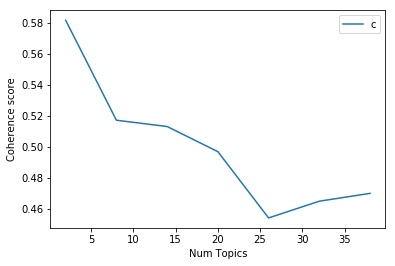

In [74]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

There is excellent coherence at the 10 topics I had used, so we will stay with that, in an effort to avoid being overly selective.

## A (Quasi) Supervised Approach

### Bag of Words

#### BoW with SKLearn CountVectorizer

In [75]:
df1 = X

In [77]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def clean_text(text):
    # 1. Remove HTML
    soup = BeautifulSoup(text)
    souped = soup.get_text()
    #
    # 2. Remove non-letters        
    #letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    #
    # 3. Convert to lower case, split into individual words
    lower_case = letters_only.lower() 
    words = tok.tokenize(lower_case)

    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = stop_words                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    #return( " ".join( meaningful_words ))   
    
    return (" ".join(words)).strip()

In [78]:
# remove punctuation from the job titles first
#X['job_description'] = X['job_description'].apply(clean_text)
for text in X:
    for i in range(len(X)):
        X['job_description'][i] = clean_text(X['job_description'][i])

In [79]:
X.head(1)

title  \
0  Research Scientist  Natural Language Processing   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [80]:
#split up for classification
y = X.job_class
X1 = X.job_description

In [81]:
y_train, y_test = train_test_split(y, test_size=0.25, random_state=42)

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

vectorizer = CountVectorizer(stop_words=stop_words, analyzer='word', ngram_range=(1, 1), max_df=.30, min_df=.05, max_features=None)
bow = vectorizer.fit_transform(X1)
print(vectorizer.get_feature_names())

['abilities', 'able', 'academic', 'access', 'accommodation', 'according', 'accuracy', 'accurate', 'achieve', 'act', 'action', 'actionable', 'actions', 'active', 'actively', 'activities', 'ad', 'addition', 'additional', 'address', 'administration', 'advance', 'affirmative', 'age', 'agile', 'ai', 'algorithm', 'along', 'always', 'amazon', 'america', 'among', 'amounts', 'analyses', 'analyst', 'analysts', 'analytic', 'analytical', 'analyze', 'analyzing', 'ancestry', 'another', 'api', 'apis', 'applicable', 'applicant', 'applicants', 'application', 'applied', 'apply', 'applying', 'approach', 'approaches', 'appropriate', 'architect', 'architecture', 'architectures', 'area', 'areas', 'around', 'art', 'artificial', 'aspects', 'assessment', 'assigned', 'assist', 'assistance', 'associated', 'attention', 'audience', 'audiences', 'authorization', 'automated', 'automation', 'available', 'aws', 'azure', 'bachelor', 'back', 'background', 'balance', 'base', 'basic', 'basis', 'become', 'behavior', 'belie

In [83]:
#Split into X_train and X_test now that BoW is complete.
X_train, X_test= train_test_split(bow, test_size=0.25, random_state=42)

### Models to test initial Bag of Words

In [84]:
start = time.time()

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9938738738738738

Test set score: 0.6997840172786177
Done in 0.37171196937561035 seconds


In [85]:
# Logistic Regression Classifier
start = time.time()
lr = LogisticRegression()
lr.fit(X_train,y_train)

print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.992072072072072

Test set score: 0.6501079913606912
Done in 1.2980320453643799 seconds


In [86]:
start = time.time()
clf = XGBClassifier()  
clf.fit(X_train,y_train)  
clf.predict(X_test)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))
cross_val = cross_val_score(clf, X_train, y_train)
print('Cross Validation Score:', cross_val)
print('Cross Validation Mean:', cross_val.mean())
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.992072072072072

Test set score: 0.6501079913606912
Cross Validation Score: [0.8049569  0.81857451 0.7937025 ]
Cross Validation Mean: 0.80574463595872
Done in 72.00537180900574 seconds


The BoW did not perform well, even with a boosted model. It is worth noting that with fewer stop words, it produced better results (~87%)

### K Means

In [87]:
# Normalize the data.
X_norm = normalize(X_train)

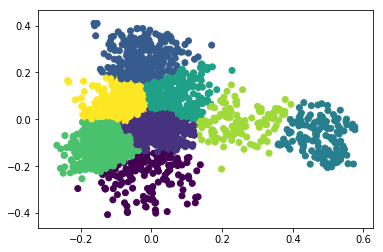

Done in 0.6801791191101074 seconds


In [88]:
start = time.time()
# Reduce it to two components.
X_pca_bow = PCA(2).fit_transform(X_norm.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=8, random_state=42).fit_predict(X_pca_bow)

# Plot the solution.
plt.scatter(X_pca_bow[:, 0], X_pca_bow[:, 1], c=y_pred)
plt.show()
end = time.time()
print("Done in", end - start, "seconds")

Pretty nice clusters, with the exception of the variance of the top right green blob. This would suggest that many of my topics are actually very similar, with perhaps one or two outliers.

### KMeans Mini-Batch

In [89]:
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

true_k = 10
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

km.fit(X_train_norm)
km_train_label = km.labels_
km_test_label = km.predict(X_test_norm)
true_k = 10
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

km.fit(X_train_norm)
km_train_label = km.labels_
km_test_label = km.predict(X_test_norm)

In [90]:
from time import time

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train_norm, y_train)
y_pred = rfc.predict(X_test_norm)

print('Training set score:', rfc.score(X_train_norm, y_train))
print('\nTest set score:', rfc.score(X_test_norm, y_test))
t0 = time()
print("Done in %0.3fs" % (time() - t0))

Training set score: 0.9956756756756757

Test set score: 0.6911447084233261
Done in 0.000s


In [91]:
# Logistic Regression Classifier
import time
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_norm,y_train)

print('Training set score:', lr.score(X_train_norm, y_train))
print('\nTest set score:', lr.score(X_test_norm, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8108108108108109

Test set score: 0.6922246220302376
Done in 0.4608430862426758 seconds


### LSA with BoW

In [92]:
# Logistic Regression Classifier
import time
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_norm,y_train)

print('Training set score:', lr.score(X_train_norm, y_train))
print('\nTest set score:', lr.score(X_test_norm, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8108108108108109

Test set score: 0.6922246220302376
Done in 0.3350362777709961 seconds


In [93]:
start = time.time()
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=5,n_iter=500)
lsa.fit(bow)
terms = vectorizer.get_feature_names()
X_train_lsa = lsa.fit_transform(X_train)
X_test_lsa = lsa.transform(X_test)

for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:10]
    print("Concept %d:" % i)
    for term in sortedterms:
        print(term[0])
    print(" ")
end = time.time()
print("Done in", end - start, "seconds")

Concept 0:
understand
service
statistical
project
others
process
speech
ensure
may
big
 
Concept 1:
utilize
operate
equipment
procedures
understand
report
others
care
ensure
maintain
 
Concept 2:
utilize
operate
report
ai
care
procedures
cloud
ml
follow
big
 
Concept 3:
statistical
insights
analytical
risk
predictive
project
statistics
methods
quantitative
analytic
 
Concept 4:
care
health
may
clinical
education
medical
students
healthcare
statistical
state
 
Done in 10.185281753540039 seconds


### Bigrams

In [94]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X1, y, test_size=0.25, random_state=42)
count_vect_bigram = CountVectorizer(stop_words=stop_words, analyzer='word', ngram_range=(1,2), max_df=.30, min_df=.1, max_features=100000)
train_data_bow_bigram = count_vect_bigram.fit_transform(X_train_clean)
test_data_bow_bigram = count_vect_bigram.transform(X_test_clean)

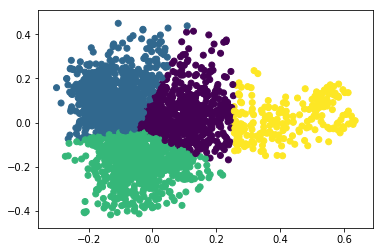

In [95]:
X_norm = normalize(train_data_bow_bigram)
# Reduce it to two components.
X_pca_bow = PCA(2).fit_transform(X_norm.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca_bow)

# Plot the solution.
plt.scatter(X_pca_bow[:, 0], X_pca_bow[:, 1], c=y_pred)
plt.show()

In [96]:
y.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Text Analytics',
       'Apache Spark', 'Speech Recognition', 'Neural Networks'],
      dtype=object)

In [97]:
labels = ['Natural Language Processing', 'Text Mining',
         'Pattern Recognition', 'Machine Learning', 'Text Analytics',
         'Apache Spark', 'Speech Recognition', 'Neural Networks']

Training set score: 0.9445045045045045

Test set score: 0.6609071274298056
Cross-Valid Bigram Fold Results are:  [0.65248227 0.6975089  0.7        0.66428571 0.71582734 0.68363636
 0.67636364 0.64727273 0.60363636 0.68978102]
Mean of Folds are =  0.673079433152281
Done in %0.3fs 9.686353921890259


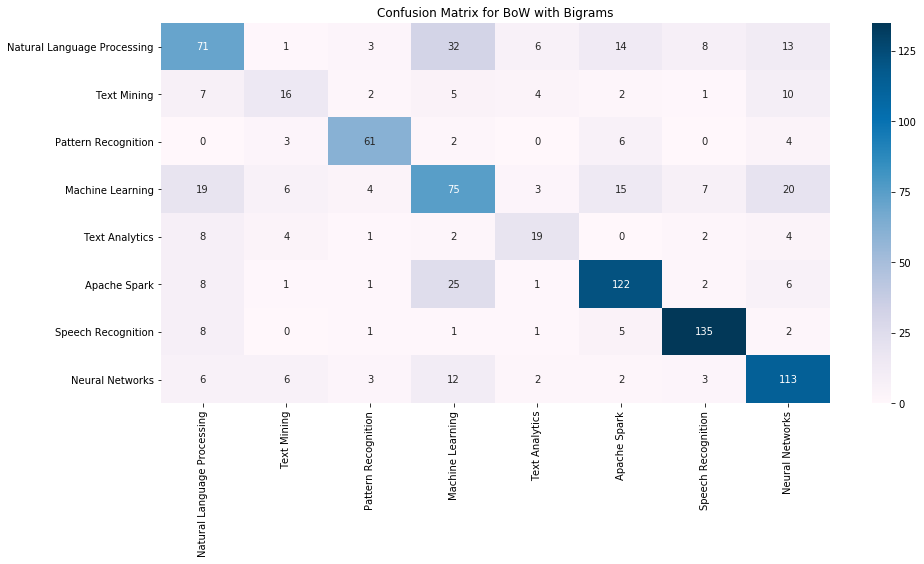

In [98]:
import time
start = time.time()

#Confusion matrix for Bigram BOW with Logistic Regression

lr = LogisticRegression()
lr.fit(train_data_bow_bigram,y_train)

print('Training set score:', lr.score(train_data_bow_bigram, y_train_clean))
print('\nTest set score:', lr.score(test_data_bow_bigram, y_test_clean))

y_pred = lr.predict(test_data_bow_bigram)

conf = confusion_matrix(y_test_clean, y_pred, labels = labels)

cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (15,7))
plt.title('Confusion Matrix for BoW with Bigrams')
sns.heatmap(cm, annot=True, cmap="PuBu", fmt = 'd')
crs = cross_val_score(lr, train_data_bow_bigram, y_train_clean, cv=10)
print("Cross-Valid Bigram Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())
end = time.time()
print("Done in %0.3fs", end - start)
#conf = confusion_matrix(y_test_clean, bigram_pred, labels = labels)

#df_cm = pd.DataFrame(conf, index = [i for i in labels],
                  #columns = [i for i in labels])
#plt.figure(figsize = (15,7))
#sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = 'd')

In [124]:
import time
start = time.time()

clf = XGBClassifier(silent=True, 
                    scale_pos_weight=1,
                    learning_rate=0.01,  
                    colsample_bytree = 0.4,
                    subsample = 0.90,
                    objective='binary:logistic', 
                    n_estimators=600, 
                    reg_alpha = 0.3,
                    max_depth=7, 
                    gamma=1)  
clf.fit(train_data_bow_bigram,y_train)
y_pred = clf.predict(test_data_bow_bigram)
#bigram_pred = clf.predict(test_data_bow_bigram.toarray())
print('Training set score:', clf.score(train_data_bow_bigram, y_train_clean))
print('\nTest set score:', clf.score(test_data_bow_bigram, y_test_clean))
cross_val = cross_val_score(clf, train_data_bow_bigram, y_train_clean)
print('Cross Validation Score:', cross_val)
print('Cross Validation Mean:', cross_val.mean())
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9679279279279279

Test set score: 0.8358531317494601
Cross Validation Score: [0.84375    0.8412527  0.82084691]
Cross Validation Mean: 0.8352832017738255
Done in 360.20064878463745 seconds


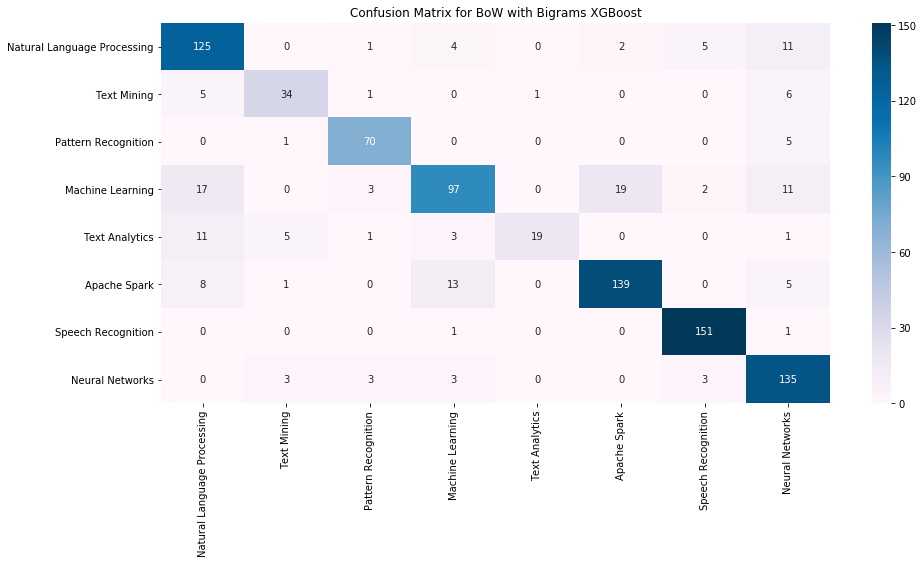

In [100]:
#Confusion matrix for XGB performance visualization on bigrams

labels = ['Natural Language Processing', 'Text Mining',
         'Pattern Recognition', 'Machine Learning', 'Text Analytics',
         'Apache Spark', 'Speech Recognition', 'Neural Networks']

conf = confusion_matrix(y_test_clean, y_pred, labels = labels)

cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (15,7))
plt.title('Confusion Matrix for BoW with Bigrams XGBoost')
sns.heatmap(cm, annot=True, cmap="PuBu", fmt = 'd')

It is interesting to note that there is more correlation between machine learning, Apache Spark and Neural Networks.  These are all fields that are "male dominated"

## TF-IDF Analysis

### Train and Test Sets


In [101]:
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(bow)
tfidf.shape

(3701, 944)

In [102]:
X_train_tfidf, X_test_tfidf = train_test_split(tfidf, test_size=0.25, random_state=42)

In [103]:
import time

start = time.time()

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train_tfidf, y_train)
y_pred = rfc.predict(X_test_tfidf)

print('Training set score:', rfc.score(X_train_tfidf, y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9917117117117117

Test set score: 0.6565874730021598
Done in 0.4032268524169922 seconds


In [104]:
# Logistic Regression Classifier
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)

print('Training set score:', lr.score(X_train_tfidf, y_train))
print('\nTest set score:', lr.score(X_test_tfidf, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8118918918918919

Test set score: 0.6792656587473002
Done in 0.37808895111083984 seconds


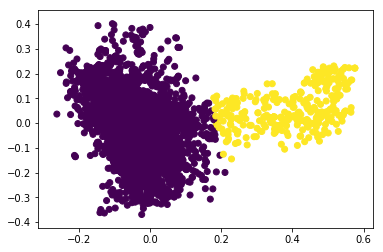

Done in %0.3fs 0.8395192623138428


In [105]:
start = time.time()
# Normalize the data.
X_normt = normalize(tfidf)
# Reduce it to two components.
X_pcat = PCA(2).fit_transform(X_normt.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pcat)

# Plot the solution.
plt.scatter(X_pcat[:, 0], X_pcat[:, 1], c=y_pred)
plt.show()
end = time.time()
print("Done in %0.3fs", end - start)

In [106]:
#en_stop = set(nltk.corpus.stopwords.words('english'))
#stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                               #'system', 'science', 'research', 'analysis', 'experience',
                               #'customer', 'include', 'plant', 'clerkship', 'language',
                               #'university', 'google', 'hadoop', 'spark', 'apache', 'microsoft',
                               #'ai', 'ml', 'nlp', 'speech', 'natural', 'engineers', 'cloud',
                               #'intelligence', 'aws', 'ml', 'nlp', 'ai']))

In [107]:
start = time.time()
rfc = ensemble.RandomForestClassifier()

vectorizer1 = TfidfVectorizer(#max_df=0.2, # drop words that occur in more than half the job descriptions
                             #min_df=10, # only use words that appear at least 10x
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case 
                             use_idf=True,
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

X_train_tfidf = vectorizer1.fit_transform(X_train_clean)
X_test_tfidf = vectorizer1.transform(X_test_clean)

fit = rfc.fit(X_train_tfidf, y_train)
y_pred = rfc.predict(X_test_tfidf)

print('Training set score:', rfc.score(X_train_tfidf, y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test))
end = time.time()
print("Done in %0.3fs", end - start)

Training set score: 0.994954954954955

Test set score: 0.6220302375809935
Done in %0.3fs 2.1358110904693604


In [108]:
df1.head(1)

title  \
0  Research Scientist  Natural Language Processing   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [109]:
df1 = df1.drop(['title', 'gender_breakdown'], axis = 1)

In [110]:
start = time.time()
X = df1['job_description']
X_norm_tfidf = normalize(vectorizer1.fit_transform(X))

true_k = 8
labels = y 
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

print("Clustering sparse data with %s" % km)
km.fit(X_norm_tfidf)
mini_labels = km.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_norm_tfidf, km.labels_, sample_size=5000))
end = time.time()
print("Done in %0.3fs", end - start)

Clustering sparse data with MiniBatchKMeans(batch_size=5000, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
Homogeneity: 0.204
Completeness: 0.205
V-measure: 0.205
Adjusted Rand-Index: 0.117
Silhouette Coefficient: 0.013
Done in %0.3fs 5.80858302116394


In [111]:
len(y)

3701

In [112]:
len(mini_labels)

3701

In [113]:
mini_labels.shape

(3701,)

In [114]:
df1['MiniBatchLabels'] = mini_labels

In [115]:
for label in set(mini_labels):
    print('Cluster: %d' % label)
    print(df1[df1.MiniBatchLabels == label].groupby('job_class').count())
    print('')

Cluster: 0
                    job_description  MiniBatchLabels
job_class                                           
Speech Recognition  211              211            

Cluster: 1
                             job_description  MiniBatchLabels
job_class                                                    
Apache Spark                 19               19             
Machine Learning             183              183            
Natural Language Processing  86               86             
Neural Networks              166              166            
Pattern Recognition          45               45             
Speech Recognition           45               45             
Text Analytics               8                8              
Text Mining                  4                4              

Cluster: 2
                             job_description  MiniBatchLabels
job_class                                                    
Apache Spark                 157              157            


The speech recognition cluster seems to stick out on it's own.  Perhaps this is similar to the cluster seen above in K-Means. Cluster 4 also is primarily comprised of some of the most male dominated fields, with the exception of one description.  This is interesting.

In [116]:
#Let's check Cluster 0 
shuffle(df1[df1.MiniBatchLabels == 0]).head(10)

job_description  \
2571  experienced marketing representative needed for our adult day servicesprimary responsibilities this position works as an extension to the marketing department essential responsibilities identify clients that are eligible for home care and adult day care services participate in community events as necessary develop professional relationships with established community organizations and potential referral sources must function independently with personal integrity and ability to work effectively educates potential referral sources about home care and the specific assets of rhhc in choosing an agency distribute marketing material including fliers brochures and give away obtain and submit complete potential client referral information for enrollment process obtain a minimum of complete referrals per week meet marketing referral goal of at least authorizations per month maintain positive vendor relationships follow up with emails and correspondence regarding referral status and assist when possible non essential functions attends all required training in service and staff meetings strives to maintain a safe working environment through the prevention of accidents the preservation of equipment and the achievement of safe working practices maintains a positive and professional demeanor toward clients visitors families and co workers adheres to all policies and procedures of renaissance home health care agency performs other duties as assigned skills active listening giving full attention to what other people are saying taking time to understand the points being made asking questions as appropriate and not interrupting at inappropriate times understanding written sentences and paragraphs in work related documents speaking talking to others to convey information effectively time management managing one s own time and the time of others critical thinking using logic and reasoning to identify the strengths and weaknesses of alternative solutions conclusions or approaches to problems active learning understanding the implications of new information for both current and future problem solving and decision making attributes oral comprehension the ability to listen to and understand information and ideas presented through spoken words and sentences oral expression the ability to communicate information and ideas in speaking so others will understand written expression the ability to communicate information and ideas in writing so others will understand written comprehension the ability to read and understand information and ideas presented in writing speech recognition the ability to identify and understand the speech of another person speech clarity the ability to speak clearly so others can understand you near vision the ability to see details at close range within a few feet of the observer problem sensitivity the ability to tell when something is wrong or is likely to go wrong it does not involve solving the problem only recognizing there is a problem deductive reasoning the ability to apply general rules to specific problems to produce answers that make sense qualifications high school diploma or general education diploma ged recommended years field experience of marketing fluent in french creole homecare healthcare field experience preferred job type full timeexperience marketing year required homecare healthcare year required language french creole required benefits offered health insurancedental insuranceretirement benefits or accounts                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [117]:
#Let's check Cluster 1
shuffle(df1[df1.MiniBatchLabels == 1]).head(10)

job_description  \
294   baidu is looking for software engineers with strong programming and development skills our paddle team is creating the next generation of deep learning systems and algorithms with a focus on sentiment analysis natural language processing text to speech synthesis and natural language processing you will build baidu s deep learning framework and push for the next generation of media outlet you will be working with a small team of highly talented researchers and product managers who are focused on advancing the ai mission here s what you will do work with baidu s deep learning framework team to build deep learning applications design overall software architecture implement efficient and fast algorithms integrate third party service apis and libraries and deploy and maintain software design and write specifications for different applications create and take ownership of projects quickly build working prototypes and produce deliverables to meet the release cycles test code for robustness usability and general reliability document code for clarity maintainability and reusability continually discover evaluate and implement new ways to maximize development and execution efficiency here s what we d like to see in you strong coding ability in c python java for a linux unix platform familiar with using deep learning framework such as tensorflow or pytorch caffe extensive experience writing clean and efficient code with good use of standard algorithms data structures and libraries strong software engineering skills you should have a strong sense of how to distill application requirements into clean testable and well documented interfaces experience in hands on development debugging and troubleshooting of large software systems culture fit mission alignment if you want to use ai to dramatically improve people s lives we will give you the best possible platform to realize this mission self directed we work best with people that are driven motivated and aspire to greatness are you the sort of person that if you have time on your hands will independently find interesting and useful things to do hungry to learn we are eager to teach you new skills but learning is hard work and this is something we hope you want to do team orientation we work in small fast moving teams we don t believe in lone wolves we watch out for each other and go after big goals together as a team                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [118]:
#Cluster 2
shuffle(df1[df1.MiniBatchLabels == 2]).head(10)

job_description  \
537   job summary the data scientist will be responsible for designing and implementing analytical models conducting statistical analysis and creating various machine learning based tools and processes such as recommendations engines prediction systems forecast models and simulations to improve and support state services and decision making this position is governed by state and federal laws administrative rules and regulations and agency policy typical functions works with business domain experts to identify needs and opportunities form and test hypotheses and redesign and automate business processes using machine learning identifies ways to extract additional value and insights from state data assets designs evaluates and implements analytic models metrics and prototypes monitors the performance of analytic models and performs tuning and retraining as necessary processes cleanses and verifies the integrity of data used for analysis evaluates new data sources for acquisition and ingestion presents results of analyses to executive business and technical audiences in verbal and written communications and presentations works directly with data engineer s to implement analytics models at enterprise scale performs other duties as assigned knowledge abilities and skills knowledge of a wide range of analytical tools and techniques knowledge of statistics and the ability to apply statistical models programmatically to real world business scenarios knowledge operations research process engineering six sigma or other applications of statistical methods for business process improvement substantial knowledge of and experience with enterprise relational database management systems rdbms expert knowledge of structured query language sql and the ability perform forecasts simulations allocations schema transformations and other complex analyses purely in sql expert knowledge of machine learning algorithms and techniques knowledge or r and python knowledge of graph databases knowledge of text mining knowledge of process mining knowledge of spatial analytics knowledge of information visualization and data visualization tools knowledge of relevant business domains such as finance healthcare or public safety ability to train test evaluate implement monitor and tune analytic models and algorithms ability to learn new business domains quickly ability to discover and understand complex real world systems and business processes and represent them as functional analytic models to support descriptive diagnostic predictive and prescriptive analytics ability to effectively communicate with non technical business stakeholders to gather problem requirements and domain knowledge and to clearly present results ability to produce effective data visualizations and experience with data storytelling ability to lead others and work with groups and independently ability to work cooperatively across a complex organization and numerous stakeholders minimum education and or experience the formal education equivalent of a master s degree in data science operations research mathematics econometrics statistics computer science systems engineering or a related field plus five years of it experience additional requirements determined by the agency for recruiting purposes require review and approval by the office of personnel management other job related education and or experience may be substituted for all of part of these basic requirements except for certification or licensure requirements job type full timeexperience data visualization years preferred data mining years preferred it years preferred education master s preferred location little rock ar preferred work authorization united states preferred                                                                                                                                                                                                                                                            

### LSA with TF-IDF

In [119]:
print("Number of features: %d" % X_train_tfidf.get_shape()[1])

Number of features: 24595


In [120]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space to about 10% of the original.
svd= TruncatedSVD(2100)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_test_lsa = lsa.transform(X_test_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of job descriptions our solution considers similar, for the first five identified topics
jobs_by_component=pd.DataFrame(X_train_lsa, index=list(X_train))
for i in range(5):
    print('Component {}:'.format(i))
    print(jobs_by_component.loc[:,i].sort_values(ascending=False)[0:10])
import time
print(time.time())

Percent variance captured by all components: 97.12987974510179
Component 0:
  (0, 1)\t1\n  (0, 3)\t2\n  (0, 10)\t1\n  (0, 11)\t1\n  (0, 15)\t4\n  (0, 16)\t1\n  (0, 17)\t1\n  (0, 18)\t1\n  (0, 23)\t1\n  (0, 24)\t4\n  (0, 26)\t1\n  (0, 29)\t1\n  (0, 31)\t1\n  (0, 32)\t1\n  (0, 33)\t7\n  (0, 36)\t4\n  (0, 37)\t8\n  (0, 38)\t4\n  (0, 39)\t2\n  (0, 46)\t1\n  (0, 47)\t1\n  (0, 48)\t2\n  (0, 49)\t5\n  (0, 50)\t1\n  (0, 52)\t1\n  :\t:\n  (0, 866)\t2\n  (0, 867)\t2\n  (0, 868)\t1\n  (0, 871)\t3\n  (0, 874)\t4\n  (0, 880)\t2\n  (0, 883)\t1\n  (0, 885)\t1\n  (0, 886)\t1\n  (0, 894)\t1\n  (0, 899)\t1\n  (0, 902)\t4\n  (0, 906)\t4\n  (0, 908)\t1\n  (0, 909)\t2\n  (0, 910)\t1\n  (0, 914)\t2\n  (0, 915)\t5\n  (0, 921)\t1\n  (0, 926)\t1\n  (0, 927)\t1\n  (0, 929)\t1\n  (0, 932)\t1\n  (0, 934)\t1\n  (0, 935)\t1                      0.635549
  (0, 8)\t1\n  (0, 10)\t1\n  (0, 15)\t1\n  (0, 21)\t1\n  (0, 36)\t3\n  (0, 37)\t2\n  (0, 38)\t1\n  (0, 52)\t1\n  (0, 53)\t2\n  (0, 56)\t1\n  (0, 58)\t2\n  (0, 61)\t

In [121]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=5,n_iter=500)
lsa.fit(tfidf)
terms = vectorizer.get_feature_names()

for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:10]
    print("Concept %d:" % i)
    for term in sortedterms:
        print(term[0])
    print(" ")

Concept 0:
ai
statistical
speech
cloud
intelligence
big
engineers
natural
platform
ml
 
Concept 1:
equipment
others
understand
service
duties
essential
speech
rules
comprehension
english
 
Concept 2:
speech
ai
amazon
ml
natural
engineers
vision
nlp
equipment
hardware
 
Concept 3:
aws
cloud
platform
architecture
agile
big
web
code
engineer
kafka
 
Concept 4:
speech
amazon
natural
ml
nlp
spoken
voice
statistical
scientist
text
 


There is definitely some overlap in NLP and Machine Learning here.  Just from the analysis, and postings I've observed this is a move companies are making. Perhaps, this can help to level the field a bit. 

In [122]:
start = time.time()
rfc = ensemble.RandomForestClassifier()

X_train_lsa = vectorizer1.fit_transform(X_train_clean)
X_test_lsa = vectorizer1.transform(X_test_clean)

fit = rfc.fit(X_train_lsa, y_train)
y_pred = rfc.predict(X_test_lsa)

print('Training set score:', rfc.score(X_train_lsa, y_train))
print('\nTest set score:', rfc.score(X_test_lsa, y_test))
end = time.time()
print("Done in %0.3fs", end - start)

Training set score: 0.9963963963963964

Test set score: 0.6263498920086393
Done in %0.3fs 2.331601142883301


In [123]:
#Try a GBM classifier here, using TF-IDF 

clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train_tfidf, y_train)
tfidf_pred = clf.predict(X_test_tfidf)

print('Training set score:', clf.score(X_train_tfidf, y_train))
print('\nTest set score:', clf.score(X_test_tfidf, y_test))

Training set score: 0.9978378378378379

Test set score: 0.8768898488120951


This was by far the best test performed.  I did attempt GBM on the Bigrams, but it took too long to run, unfortunately.

### Overall, I think there are some things of note in this analysis.  There is likely some correlation in the job postings that are "male-dominated" as noted in the confusion matrix for Bigrams. The LDA analysis was very helpful as well.  The PyLDAviz showed us that there are some topics that features some of the more "collaborative" words that would possibly attract women to apply, according to the preliminary research I did. 
### The outcomes were not as consclusive as I would have hoped for them to be, so I do think some further study is warranted here.  However, in my next notebook, we will project new job descriptions into the LDA space built here and see how they differ from one another.  This gets a step closer to the "Turnitin" style product I discussed in my proposal.